In [294]:
#Formattage du Notebook
from IPython.core.display import HTML
HTML("C:/Users/justi/Downloads/bank_marketing/style.css")

# **I.  DATASET**

# **Feature description of the dataset**

Input variables:

1. **age** (numeric).
2. **job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
3. **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
4. **education** (categorical: "unknown","secondary","primary","tertiary").
5. **default**: has credit in default? (binary: "yes","no").
6. **balance**: average yearly balance, in euros (numeric) .
7. **housing**: has housing loan? (binary: "yes","no").
8. **loan**: has personal loan? (binary: "yes","no")
Related with the last contact of the current campaign:
9. **contact**: contact communication type (categorical: "unknown","telephone","cellular") .
10. **day**: last contact day of the month (numeric).
11. **month**
: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
12. **duration**: last contact duration, in seconds (numeric).
Other attributes:
13. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact).
14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
15. **previous**: number of contacts performed before this campaign and for this client (numeric).
16. **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").
17. **Output** variable (desired target):
18. **Target** y - has the client subscribed a term deposit? (binary: "yes","no").
Missing Attribute Values: None.

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
from scipy.optimize import check_grad # Check accuracy between objective and gradient values
from scipy.linalg import norm # Euclidean norm

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# os.chdir('/content/drive/My Drive/bank_marketing/')
os.chdir('C:/Users/justi/Downloads/bank_marketing/')

In [6]:
train_data = pd.read_excel('bank-full.xlsx')
train_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
test_data = pd.read_csv('bank.csv', sep = ';') 
test_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Separation of the target and the rest of the features 

In [8]:
# X_train = train_data.copy()
# X_test = test_data.copy()

In [9]:
# y_train = X_train[['y']]
# y_test = X_test[['y']]

In [10]:
train_data = train_data.drop(['month', 'day'], axis = 1);
test_data = test_data.drop(['month', 'day'], axis = 1);

Concat the feature coming from the testing set and the training set

In [11]:
data = pd.concat([train_data, test_data])

In [12]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
count,49732.000000,49732,49732,49732,49732,49732.000000,49732,49732,49732,49732.000000,49732.000000,49732.000000,49732.000000,49732,49732
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,10678,30011,25508,48841,NaN,27689,41797,32181,NaN,NaN,NaN,NaN,40664,43922
mean,40.957472,NaN,NaN,NaN,NaN,1367.761562,NaN,NaN,NaN,258.690179,2.766549,40.158630,0.576892,NaN,NaN
std,10.615008,NaN,NaN,NaN,NaN,3041.608766,NaN,NaN,NaN,257.743149,3.099075,100.127123,2.254838,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [13]:
for col in data.select_dtypes('object').columns:
    print('------------------------------------ \n')
    print('------------------',col, '------->\n', data[col].value_counts()/data.shape[0])

------------------------------------ 

------------------ job ------->
 blue-collar      0.214711
management       0.209664
technician       0.168202
admin.           0.113589
services         0.091913
retired          0.050149
self-employed    0.035430
entrepreneur     0.033278
unemployed       0.028774
housemaid        0.027186
student          0.020550
unknown          0.006555
Name: job, dtype: float64
------------------------------------ 

------------------ marital ------->
 married     0.603455
single      0.281227
divorced    0.115318
Name: marital, dtype: float64
------------------------------------ 

------------------ education ------->
 secondary    0.512909
tertiary     0.294599
primary      0.151391
unknown      0.041100
Name: education, dtype: float64
------------------------------------ 

------------------ default ------->
 no     0.982084
yes    0.017916
Name: default, dtype: float64
------------------------------------ 

------------------ housing ------->
 yes    0.

### **Missing value in the dataset**
There is no missing value in the dataset

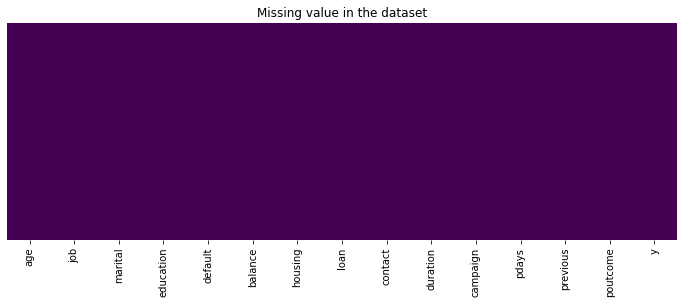

In [14]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

## Knowing variables  

In [202]:
data['y'].value_counts()

no     43922
yes     5810
Name: y, dtype: int64

## Plotting target variable  

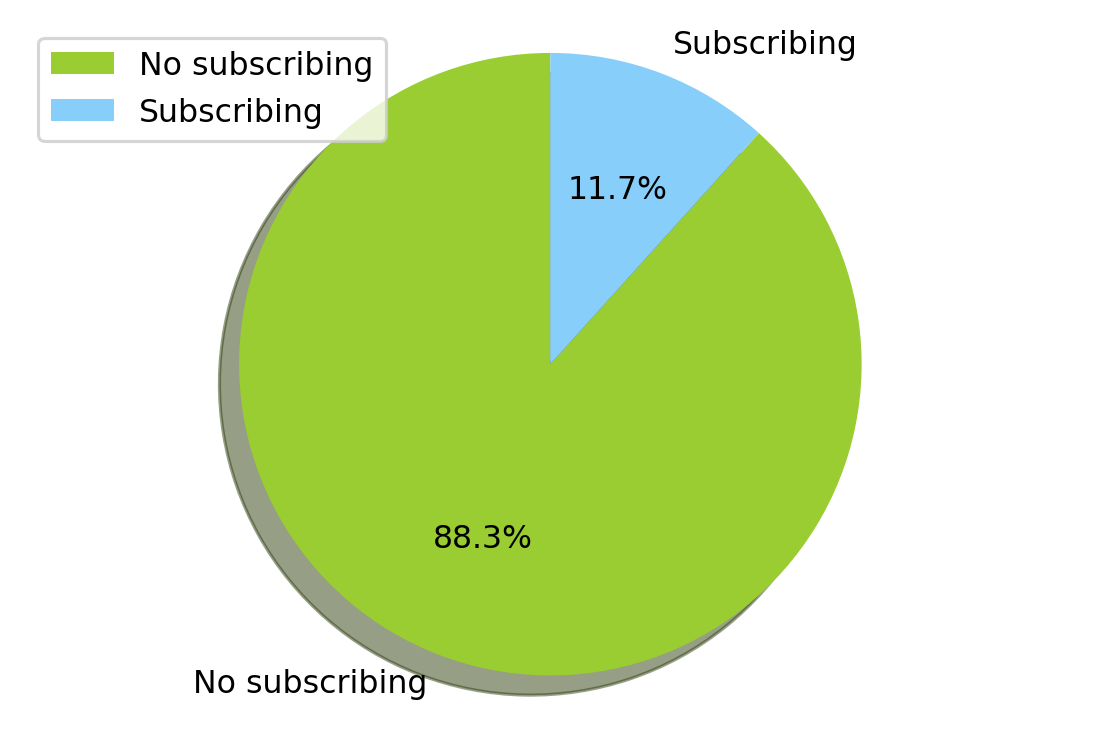

In [215]:

import matplotlib.pyplot as plt

labels = 'No subscribing', 'Subscribing'

sizes = [43922, 5810 ]
colors = ['yellowgreen', 'lightskyblue']
explode = (0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')


plt.legend()
plt.savefig('PieChart01.png')
plt.show()


## Age 

C:\Users\justi\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\justi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


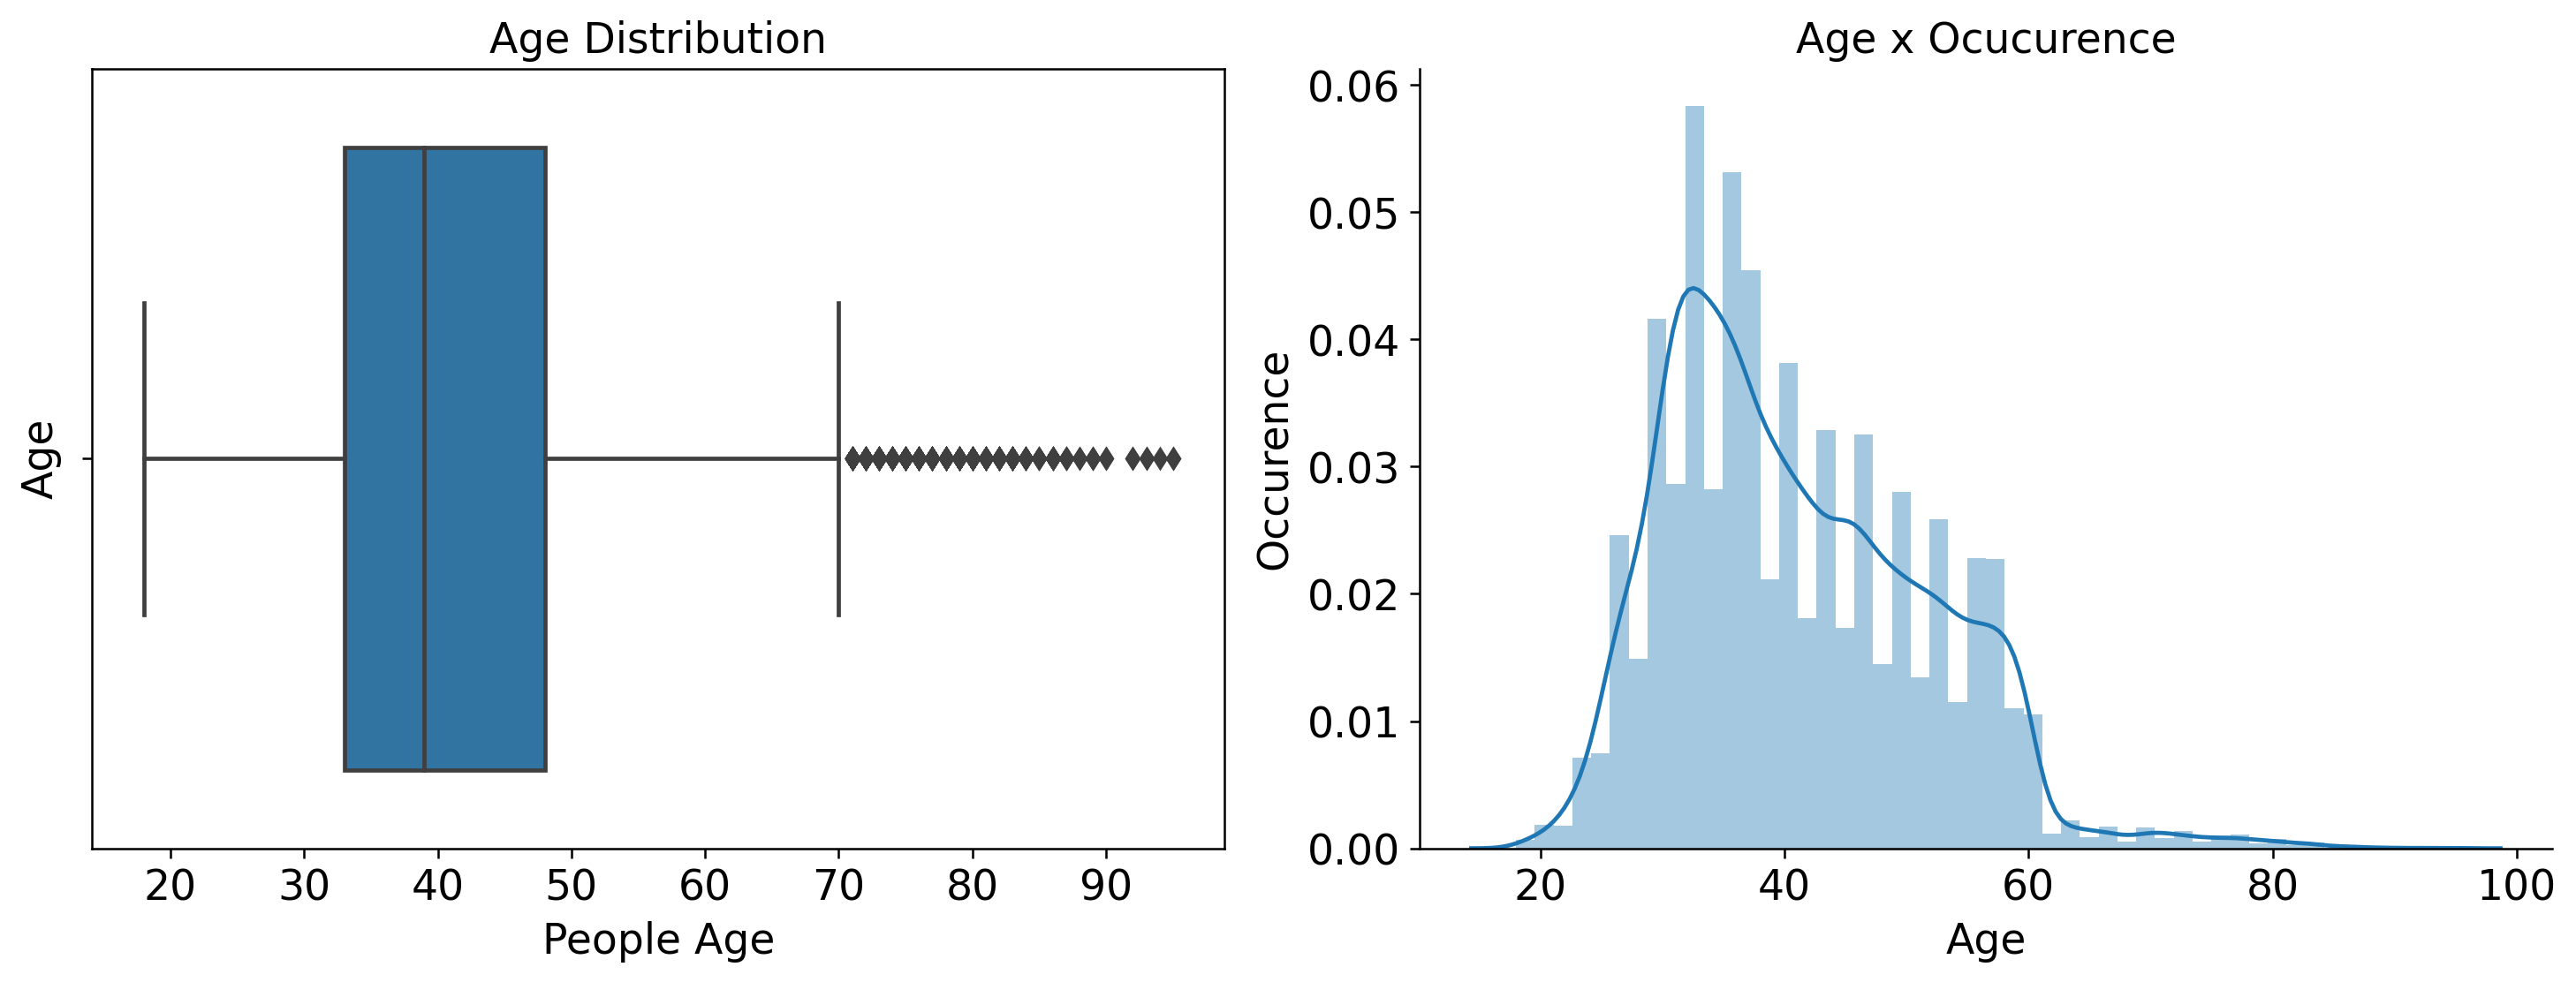

In [217]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

## JOB 

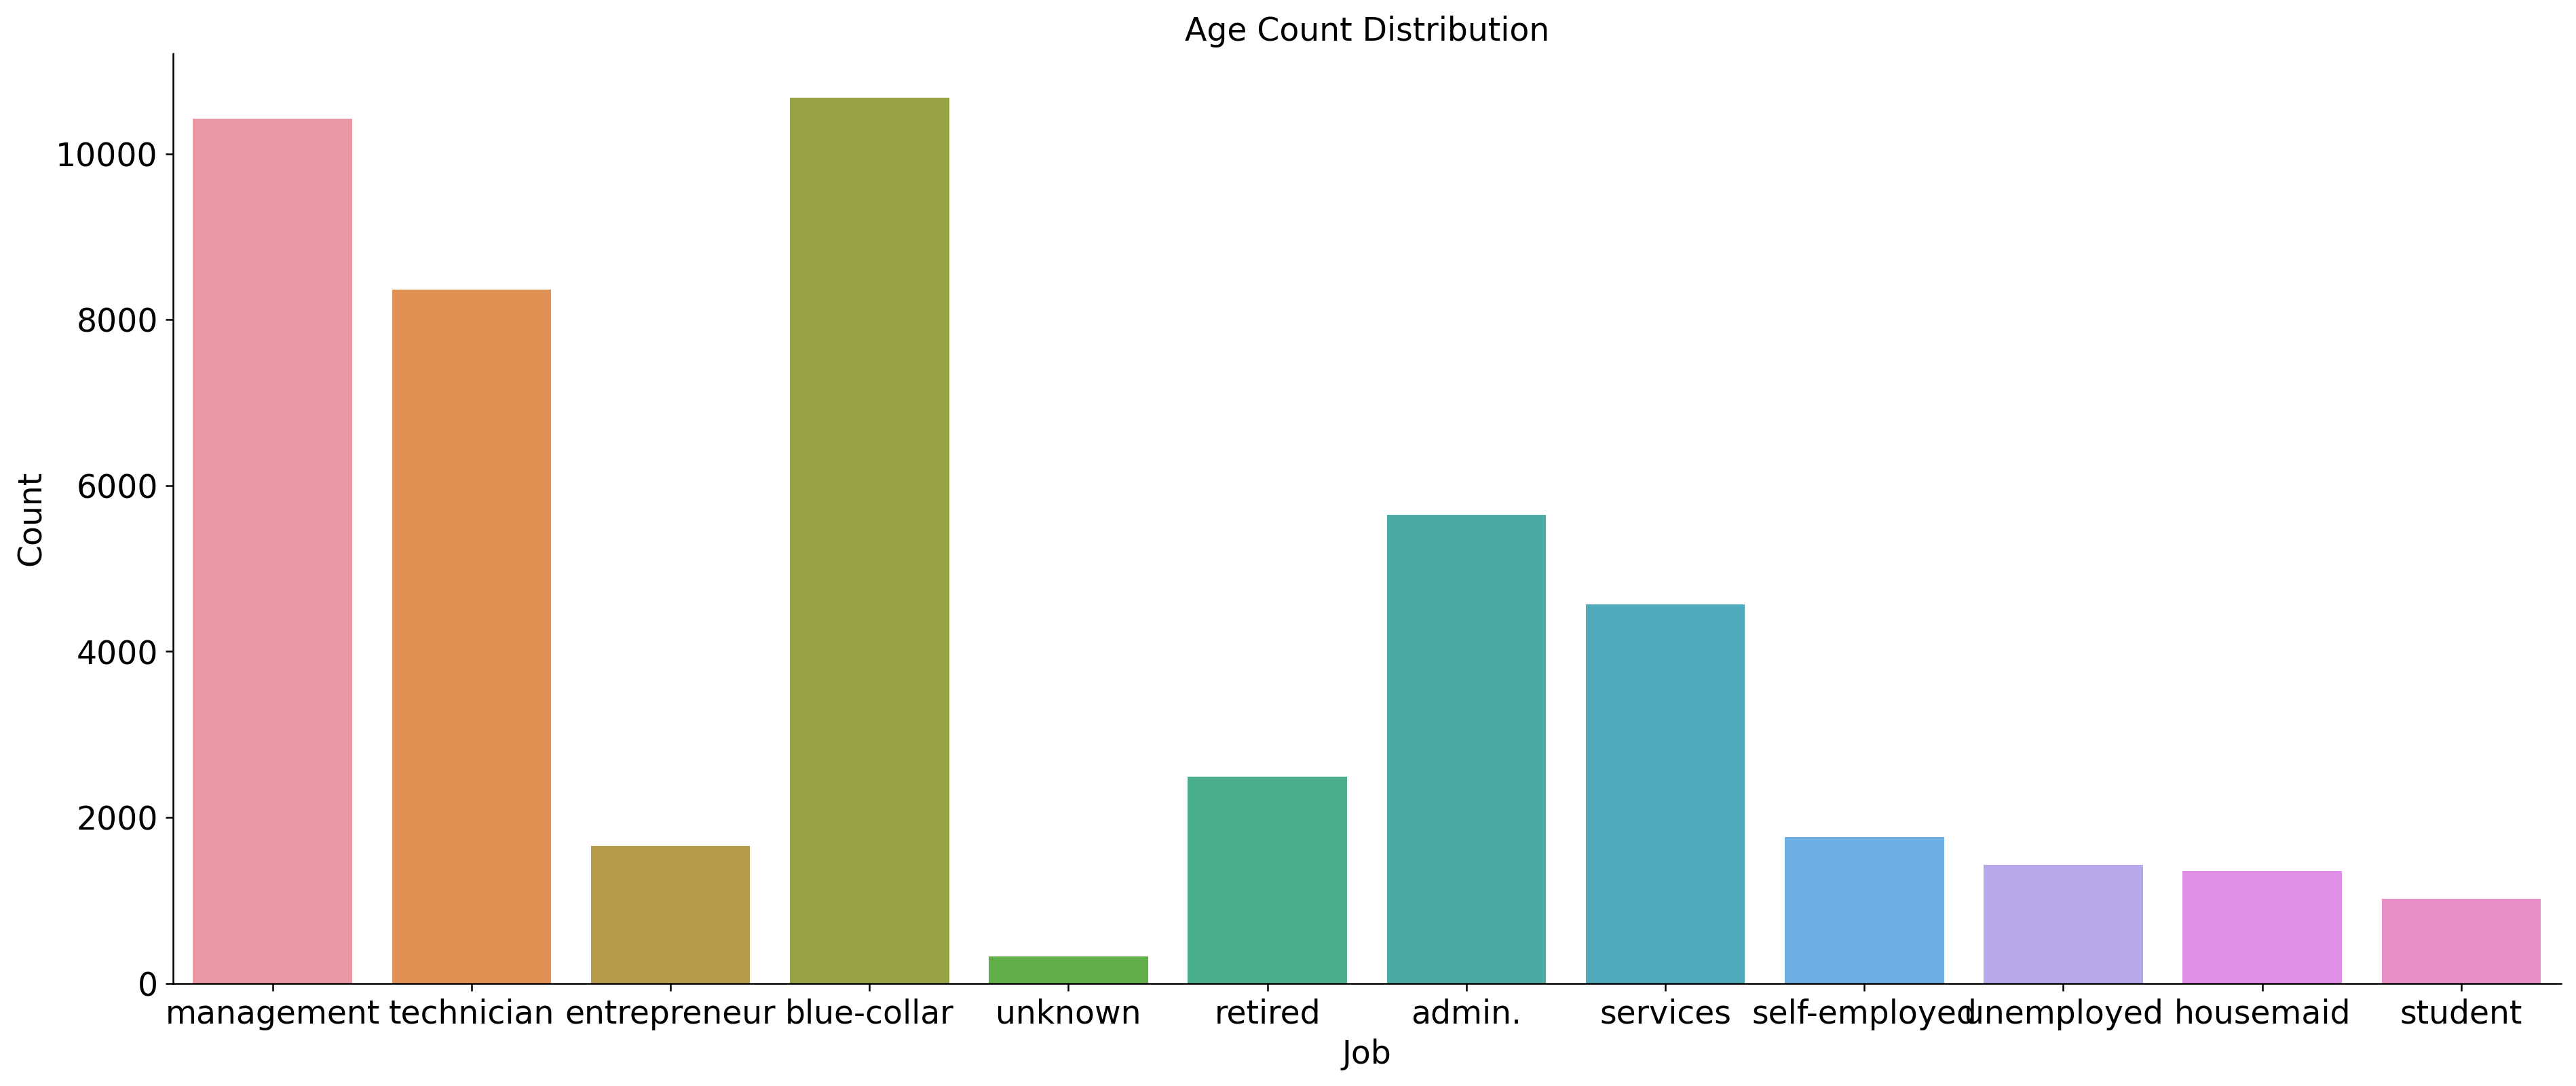

In [290]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = data)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## MARITAL

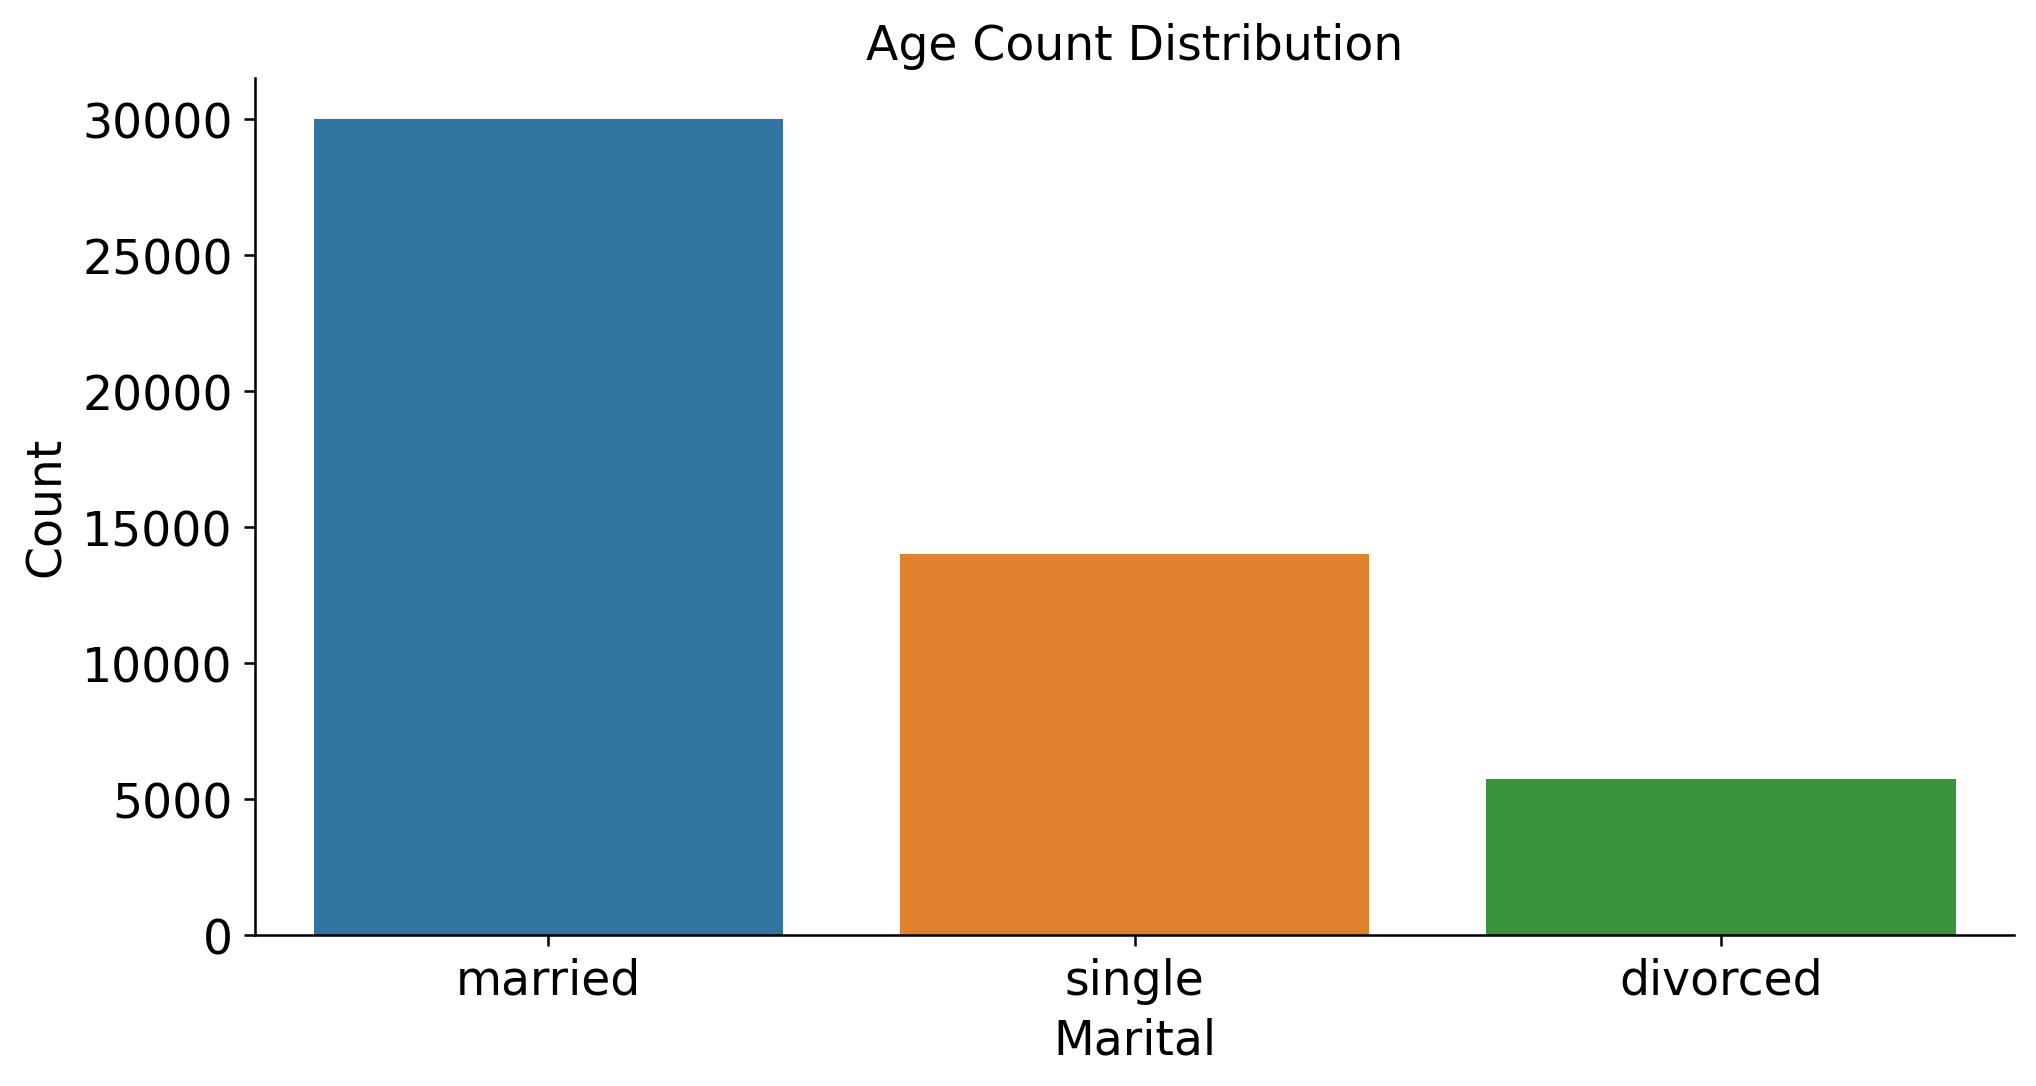

In [291]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = data)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## EDUCATION  

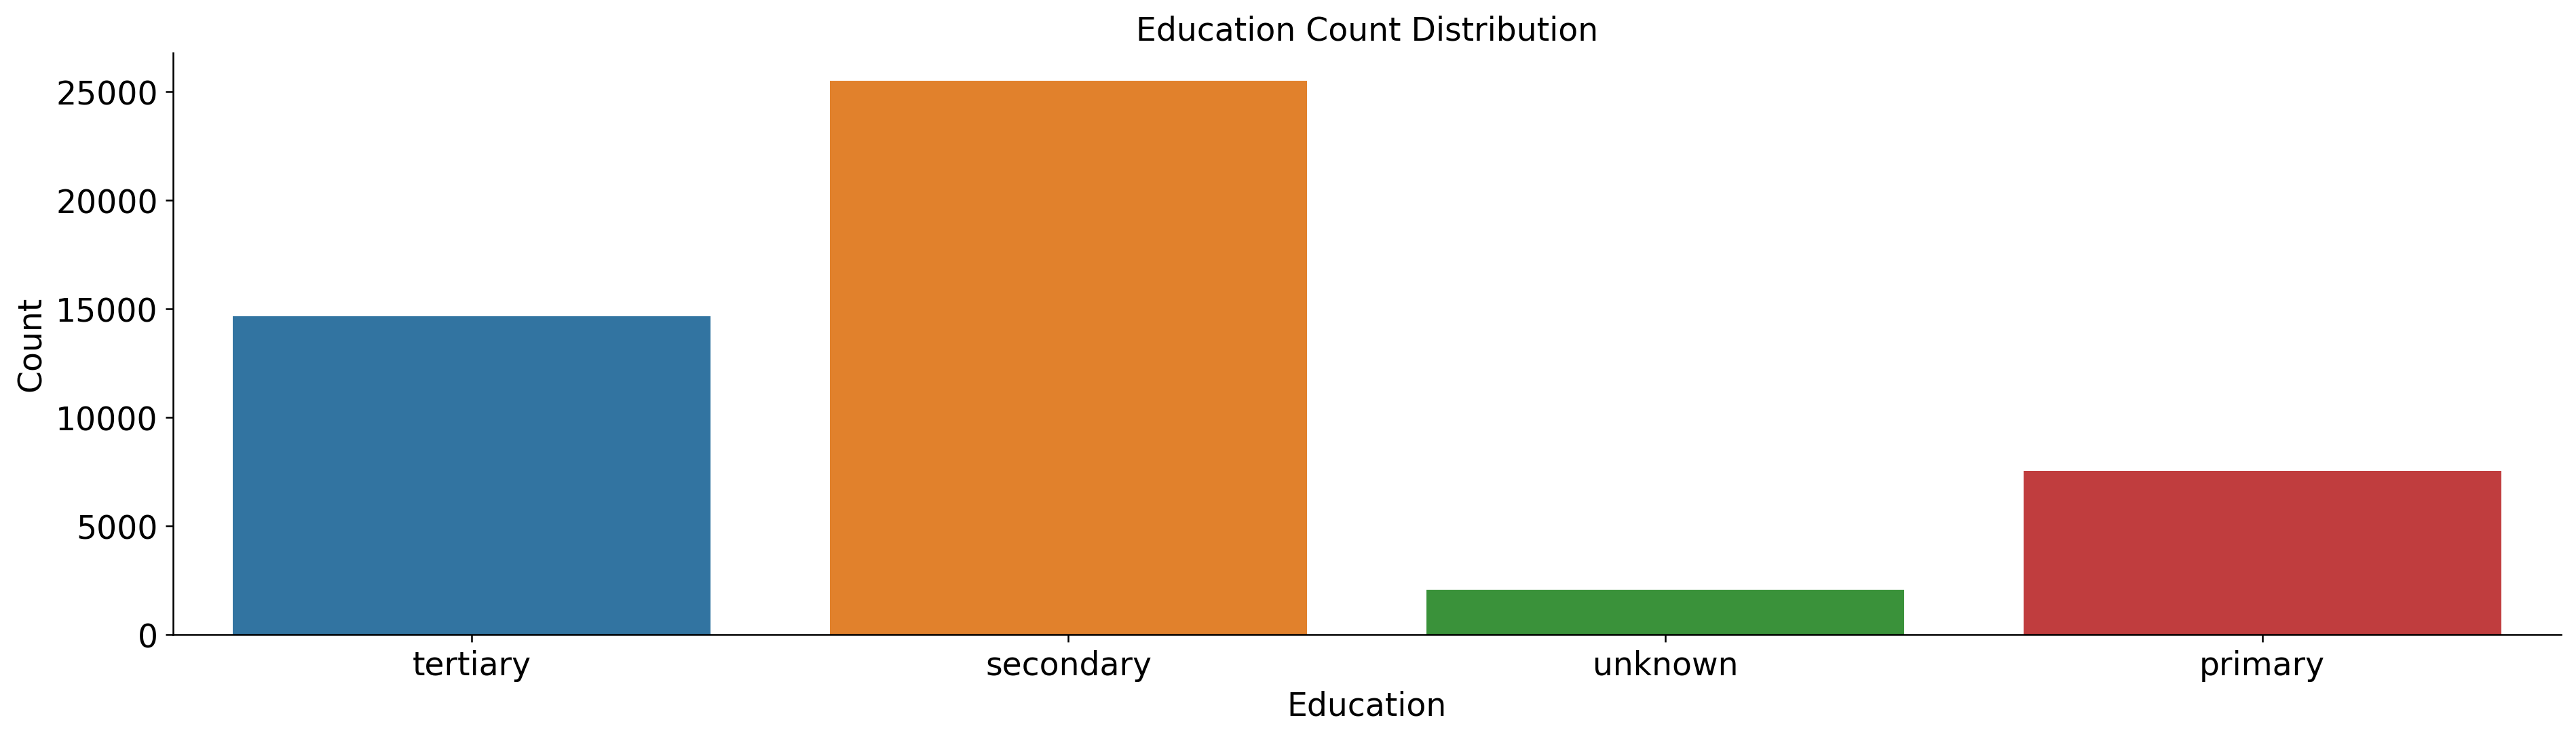

In [292]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# **II. Preprocessing**

This step consists to prepare the dataset for the machine learning part. 

In [15]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [16]:
liste = data.select_dtypes('object').columns
liste

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')

In [17]:
for col in liste:
  print(col, '------->', data[col].unique())


job -------> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital -------> ['married' 'single' 'divorced']
education -------> ['tertiary' 'secondary' 'unknown' 'primary']
default -------> ['no' 'yes']
housing -------> ['yes' 'no']
loan -------> ['no' 'yes']
contact -------> ['unknown' 'cellular' 'telephone']
poutcome -------> ['unknown' 'failure' 'other' 'success']
y -------> ['no' 'yes']


In [18]:
for col in liste:
  print(col, '------->', data[col].unique().size)

job -------> 12
marital -------> 3
education -------> 4
default -------> 2
housing -------> 2
loan -------> 2
contact -------> 3
poutcome -------> 4
y -------> 2


In [19]:
liste_1 = [] # modalités égal à 2
liste_2 = [] # modaliités supérieur à 2

for col in liste:
  if data[col].unique().size > 2:
    liste_2.append(col)
  else:
    liste_1.append(col)


In [20]:
liste_1

['default', 'housing', 'loan', 'y']

In [21]:
liste_2

['job', 'marital', 'education', 'contact', 'poutcome']

In [22]:
del liste_2[liste_2.index('job')]

In [23]:
new_data_1 = pd.get_dummies(data[liste_1], drop_first = True) #catégorielles,  modalités égal à 2 
new_data_2 = pd.get_dummies(data[liste_2]) #one-hot-encoding,  modalités supérieures à 2

In [24]:
df = pd.concat([data, new_data_1, new_data_2], axis = 1)

In [25]:
df = df.drop(liste_1, axis = 1)
df = df.drop(liste_2, axis = 1)
df = df.drop('job', axis=1)

In [26]:

df.head(5)

,age,balance,duration,campaign,pdays,previous,default_yes,housing_yes,loan_yes,y_yes,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,29,151,1,-1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,2,76,1,-1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
3,47,1506,92,1,-1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [27]:
# pip install dataprep

In [28]:
# pip install weasyprint

In [29]:
# from dataprep.eda import *
# create_report(data)

Normalization 

In [30]:
# norm_input = df[['age']]
# min_max_input = df[['balance', 'duration', 'previous', 'campaign', 'pdays']]
df[['age']]= df[['age']].apply(lambda x : (x - x.mean())/ x.std(), axis = 0)
df[['balance', 'duration', 'previous', 'campaign', 'pdays']] = df[['balance', 'duration', 'previous', 'campaign', 'pdays']].apply(lambda x : (x - x.min())/ (x.max()- x.min()), axis = 0)

In [31]:
df.head()

,age,balance,duration,campaign,pdays,previous,default_yes,housing_yes,loan_yes,y_yes,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.605513,0.092259,0.053070,0.0,0.0,0.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0.286625,0.073067,0.030704,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,-0.749644,0.072822,0.015453,0.0,0.0,0.0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
3,0.569244,0.086476,0.018707,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,-0.749644,0.072812,0.040260,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [32]:
liste_unknown = ['poutcome_other', 'education_unknown']
df = df.drop(liste_unknown, axis = 1)

Dataset divides into the training and testing set

In [33]:
X_data = df.drop(['y_yes'], axis = 1)
y_data = df['y_yes']

Set the classes indexes to be $\{−1,+1\}$.

In [34]:
y_data = 2.0 * y_data.astype('float64') - 1.0

In [35]:
# X_data = X_data.astype('float64')

In [36]:
X_data.shape

(49732, 21)

In [37]:
X_train = X_data[:len(train_data)]
X_test = X_data[len(train_data):]

In [38]:
y_train = y_data[:len(train_data)]
y_test = y_data[len(train_data):]

In [39]:
y_train.shape

(45211,)

We put the **target** in the form of an array in order to do machine learning

The base being too large, we choose a little more than 20%, for that we will use the method train_test_split of scikit-learn 

In [40]:
from sklearn.model_selection import train_test_split
X_train,_, y_train,_= train_test_split(X_train, y_train, train_size = 10000,
                                       shuffle = True, stratify = y_train)

In [41]:
X_train.shape

(10000, 21)

In [42]:
y_train.shape

(10000,)

In [43]:
y_train.value_counts()/y_train.shape[0]

-1.0    0.883
 1.0    0.117
Name: y_yes, dtype: float64

In [44]:
# def find(x): return np.nonzero(x)[0]

# I = find(y==-1)
# J = find(y==1)
# plt.clf
# plt.plot(X[I,0], X[I,1], '.')
# plt.plot(X[J,0], X[J,1], '.')
# plt.axis('equal');

# <span style="color:rgb(92,29,79)">III. Logistic regression</span>

## Presentation of the problem  

In *logistic regression*, we still consider a linear model, but we use a loss function better suited for classification:
$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} f(w) 
    := \frac{1}{n} \sum_{i=1}^n f_i(\mathbf{w}), \qquad 
    f_i(\mathbf{w})=\log(1+\exp(-y_i \mathbf{x}_i^T \mathbf{w}))+\frac{\lambda}{2}\|\mathbf{w}\|^2, \text{ for Ridge} \qquad f_i(\mathbf{w})=\log(1+\exp(-y_i \mathbf{x}_i^T \mathbf{w}))+\frac{\lambda}{2}\|\mathbf{w}\|_{1}, \text{ for Lasso}
$$
where every $y_i$ is a binary label in $\{-1,1\}$ and $\lambda \ge 0$ is a regularization parameter.

1. ***$\nabla f_i(\mathbf{w}) = - \frac{y_i}{1 + \exp(y_i \mathbf{x}_i^T \mathbf{w})} \mathbf{x}_i + \lambda \mathbf{w}$;***
2. ***$L=\frac{\|\mathbf{X}^T \mathbf{X}\|}{4n}+\lambda$ is a Lipschitz constant for $\nabla f$.***

**Proof:**

1. The derivative of $t \mapsto \log(1+\exp(-t))$ is $t \mapsto \frac{-\exp(-t)}{1+\exp(-t)} = -\frac{1}{1+\exp(t)}$. Combining this with the linear function $\mathbf{w} \mapsto y_i \mathbf{x}_i^T \mathbf{w}$, we get for every $i$ that
$$
\nabla f_i(\mathbf{w}) = - \frac{y_i}{1 + \exp(y_i \mathbf{x}_i^T \mathbf{w})} \mathbf{x}_i + \lambda \mathbf{w}.
$$
and 
$$
\nabla f(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^n  -\frac{y_i}{1 + \exp(y_i \mathbf{x}_i^T \mathbf{w})} \mathbf{x}_i + \lambda \mathbf{w}
$$
2. One way to obtain a Lipschitz constant for the gradient is to bound the second-order derivative, which is given by:
$$
\nabla^2 f(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^n  
\frac{\exp(-y_i \mathbf{x}_i^T \mathbf{w})}{(1 + \exp(-y_i \mathbf{x}_i^T \mathbf{w}))^2} \mathbf{x}_i \mathbf{x}_i^T + \lambda I,
$$
where $I$ is the identity matrix. The result follows by noticing that $t \mapsto \tfrac{e^{t}}{(1+\exp(t))^2}$  is always less than or equal to $\tfrac{1}{4}$ (its value at the origin). So, 
$$
\nabla^2 f(\mathbf{w}) \le \frac{1}{4n}||X^TX|| + \lambda
$$

### Defining important functions like Gradient, partial and objective

In [45]:
#  convert to a column vector
def MakeCol(y): return y.values.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.values.reshape(1,-1)

In [46]:
# y must be a column vector
y_train = MakeCol(y_train)
y_test = MakeCol(y_test)

In [47]:
# Convert dataframe object into numpy ndarray type
X_train = np.array(X_train)

In [48]:
U, s, V = np.linalg.svd(X_train)
Xr = X_train.dot( V.transpose() )

In [49]:
[n,p] = X_train.shape
print(n,p)

10000 21


In [50]:
y_train.shape

(10000, 1)

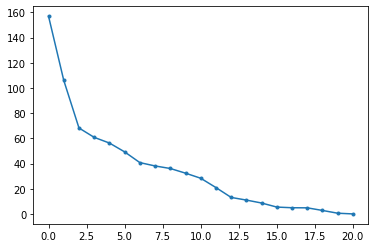

In [51]:
# display the decay of eigenvalues
plt.plot(s, '.-');

### Define gradients and hessian without regularization terms 

In [133]:
def L(s,y):  return 1/n * np.sum( np.log( 1 + np.exp(-s*y) ) )
def E(w,X,y): return L(X.dot(w),y)
def theta(v): return 1 / (1+np.exp(-v))
def nablaL(s,y): return - 1/n * y * theta(-s * y)
def nablaE(w,X,y): return X.transpose().dot( nablaL(X.dot(w),y) )

In [134]:
def lipgrad(X):
    lip = norm(X, ord=2) ** 2 / (4*n)
    return lip

In [135]:
L_ = lipgrad(X_train)

### Define gradients and hessian with regularization terms 

In [136]:
# Initialization
Lambda = 1. / n ** (0.5)
regularization = 'L2'

In [137]:
def reg_term(w): 
    if regularization == 'L2':
        reg = Lambda * norm(w) ** 2 / 2.
    elif regularization == 'L1':
        reg = Lambda * np.linalg.norm(w,1)
    return reg

In [138]:
def grad_reg_term(w): 
    if regularization == 'L2':
        gr = Lambda * w
    elif regularization == 'L1':
        gr = Lambda * np.sign(w)
    return gr

In [139]:
def L(s,y):  return 1/n * np.sum( np.log( 1 + np.exp(-s*y) ) )
def Ew(w,X,y): return L(X.dot(w),y) + reg_term(w)
def theta(v): return 1 / (1 + np.exp(-v))
def nablaL(s,y): return - 1/n * y * theta(-s * y) 
def nablaEw(w,X,y): return X.transpose().dot( nablaL(X.dot(w),y) ) + grad_reg_term(w)

### Define metrics predictions and evaluate

In [305]:
def predict(X,w):
    return theta(X.dot(w))

In [306]:
def evaluate(X,y,w):
    pred = predict(X,w)
    y = np.where(y==-1,0,1)
    pred = np.where(pred>0.5,1,0)
    diff = np.abs(y - pred)

    return (1-(sum(diff)/len(diff))[0])*100

## **III.1 GRADIENT DESCENT** 

###  Gradient descent

In [161]:
w0 = np.zeros( (p,1) )

def gradient_descent_1(w0, niter=5000,stepchoice=0, step0=1):
    """
        A code for gradient descent with various step choices.
        
        Inputs:
            w0: Initial vector
            stepchoice: Strategy for computing the stepsize 
                0: Constant step size equal to 1/L
                t>0: Step size decreasing in 1/(k+1)**t
            step0: Initial steplength (only used when stepchoice is not 0)
            niter: Number of iterations, used as stopping criterion
            nb: Number of components drawn per iteration/Batch size 
                1: Classical stochastic gradient algorithm (default value)
            with_replace: Boolean indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
            
        Outputs:
            w_output: Final iterate of the method (or average if average=1)
            objvals: History of function values (Numpy array of length n_iter at most)
            normits: History of distances between iterates and optimum (Numpy array of length n_iter at most)
    """

    Elist = np.zeros([niter,1])
    w = w0.copy()  # initialization
    for i in np.arange(0,niter):
        if stepchoice == 0 :
            w = w - (step0/L_) * nablaEw(w,X_train,y_train)
        elif stepchoice > 0 :
            sk = float(step0/((i+1) ** stepchoice))
            w = w - sk * nablaEw(w,X_train,y_train)
        Elist[i] = Ew(w,X_train,y_train)

    ndisp = int(niter/4)

    ## display ##
    plt.clf
    plt.figure(figsize=(7, 6))
    plt.subplot(2,1,1)
    plt.plot(np.arange(0,ndisp), Elist[0:ndisp])
    plt.axis('tight')
    plt.title('$f(w_l)$')
    plt.subplot(2,1,2);
    plt.plot(np.arange(1,ndisp), np.log10(Elist[1:ndisp]-np.min(Elist))  )
    plt.axis('tight')
    plt.title('$log(f(w_l) - min f)$')
#     plt.savefig('Gradient_Descent_L2_regularization.png')
    

*Gradient descent with constant stepsize and without regularization and the step size strategies $\alpha_k = \tfrac{1}{L}$* 

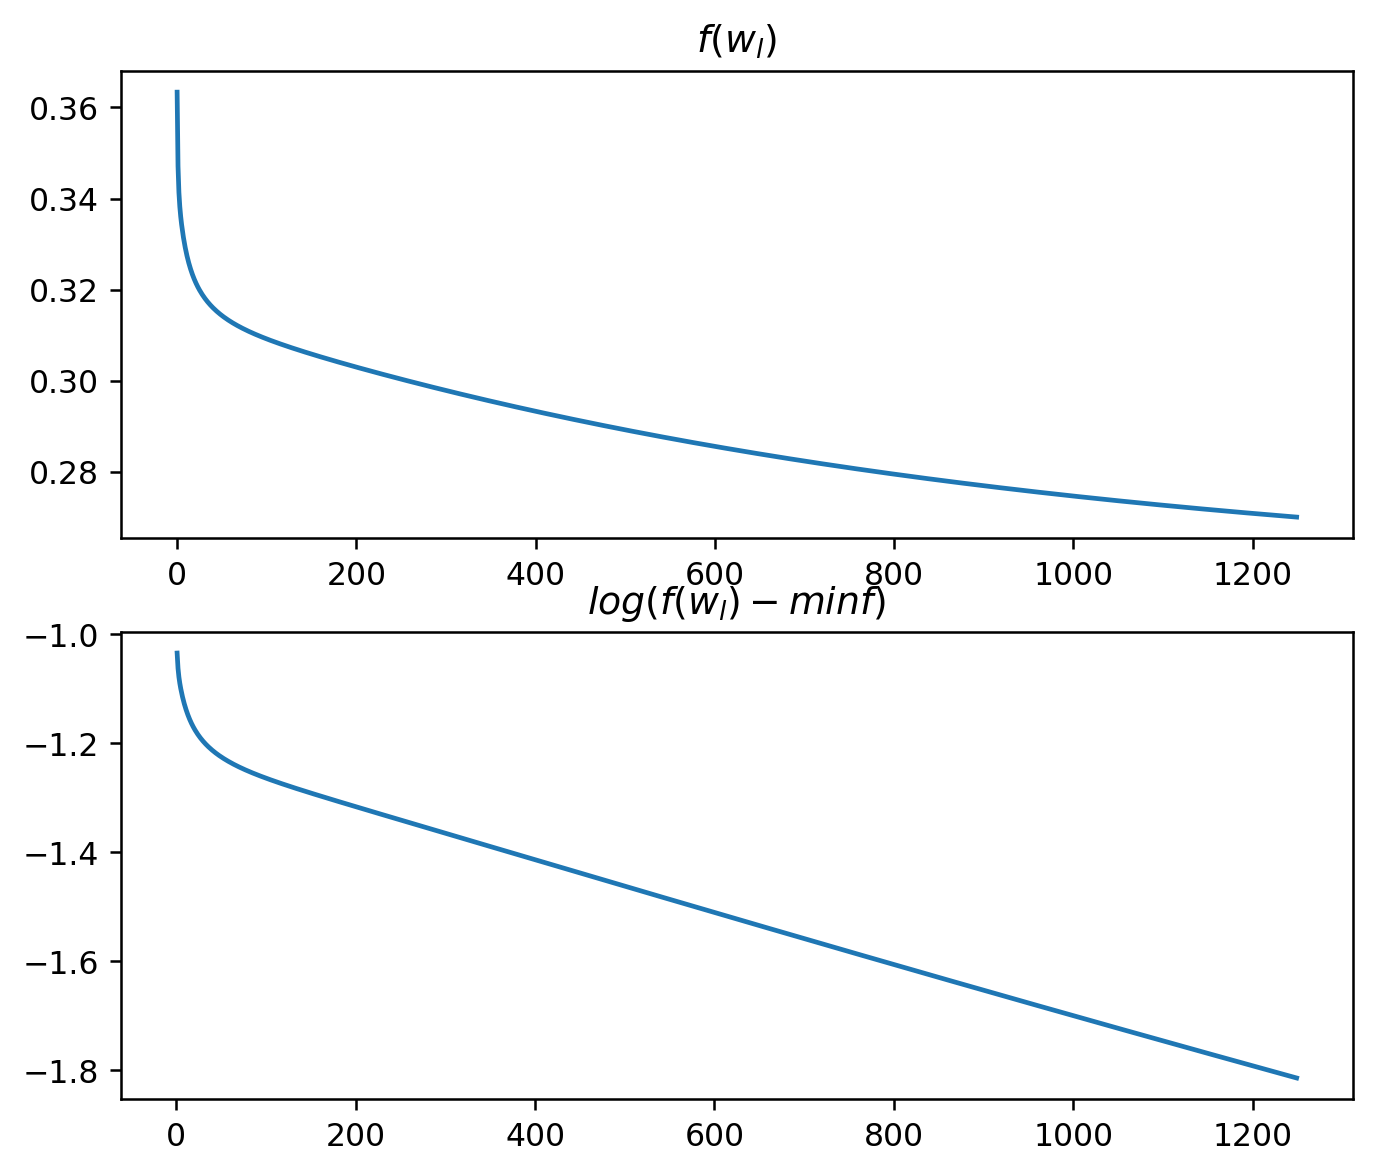

In [157]:
Lambda = 0
gradient_descent_1(w0, niter=5000,  stepchoice=0, step0=1)

*Implementation:* *Compare stochastic gradient and gradient descent on the logistic regression problem with 30 epochs and the step size strategies $\alpha_k = \tfrac{1}{L}$ and $\alpha_k = \tfrac{0.2}{\sqrt{k+1}}$.*

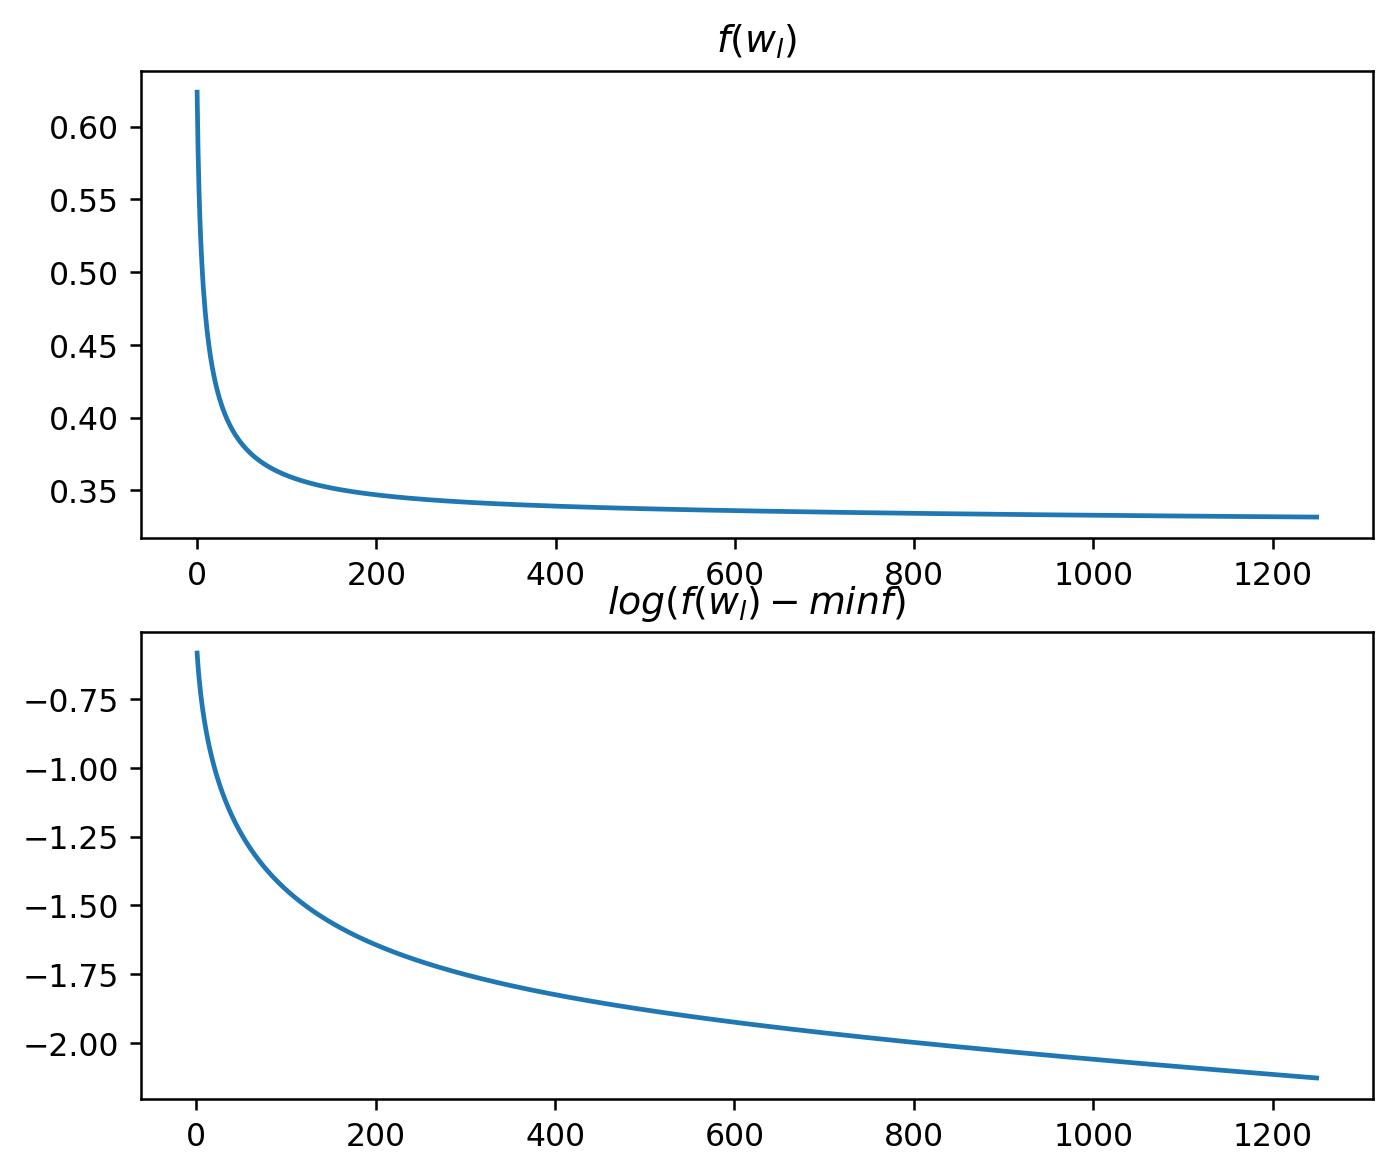

In [158]:
Lambda = 0 
gradient_descent_1(w0, niter = 5000, stepchoice=0.5, step0=0.2)

# Test of Regularization

## **III.1a Lasso regularization** 

C:\Users\justi\AppData\Local\Temp/ipykernel_19332/4045506462.py:46: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.arange(1,ndisp), np.log10(Elist[1:ndisp]-np.min(Elist))  )


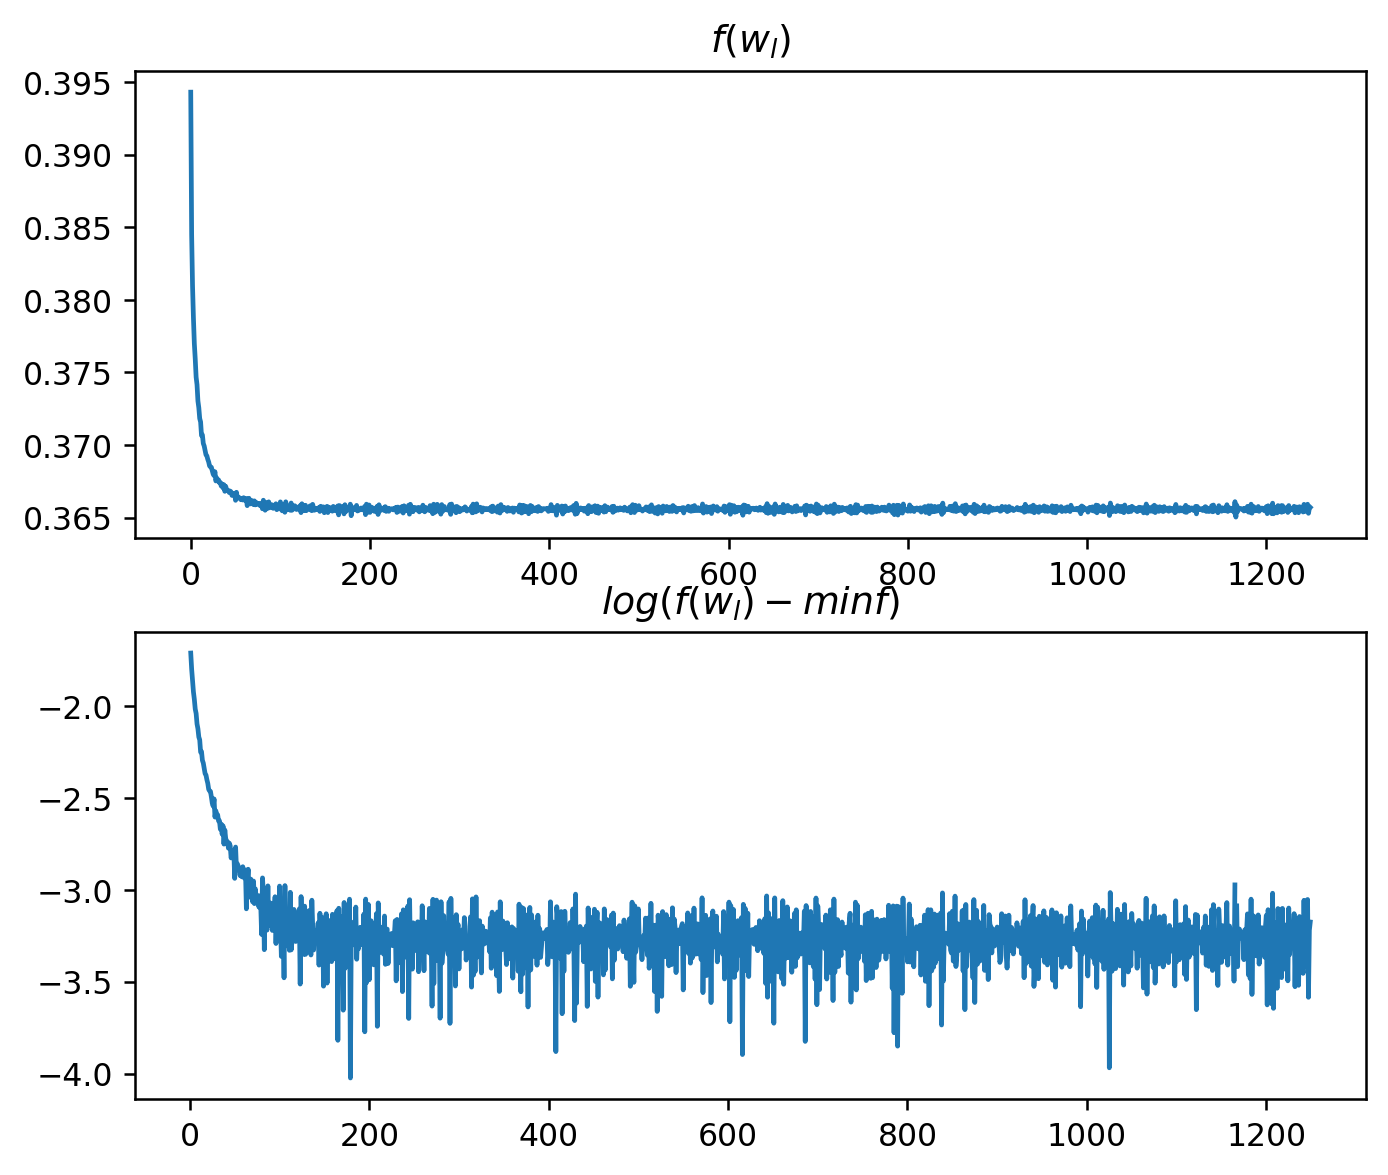

In [160]:
Lambda = 1. / n ** (0.5)
regularization = 'L1'
gradient_descent_1(w0, niter = 5000,  stepchoice=0, step0=1)

## **III.1b Ridge regularization**

C:\Users\justi\AppData\Local\Temp/ipykernel_19332/2893818740.py:46: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.arange(1,ndisp), np.log10(Elist[1:ndisp]-np.min(Elist))  )


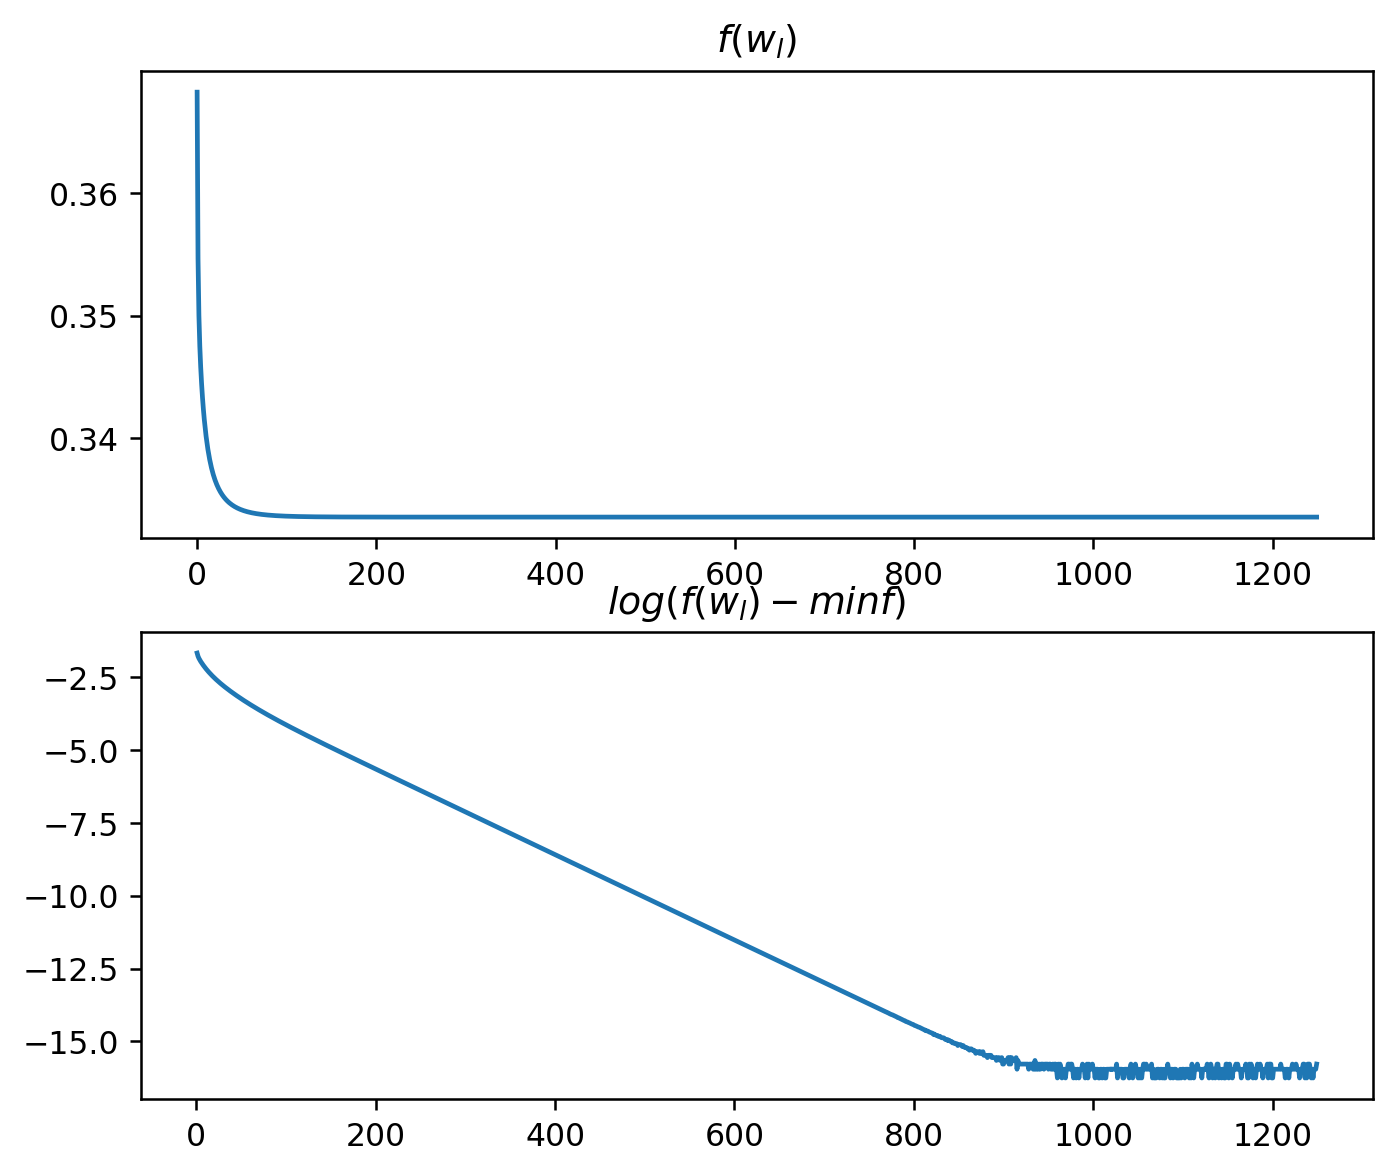

In [162]:
Lambda = 1. / n ** (0.5)
regularization = 'L2'
gradient_descent_1(w0, niter=5000,  stepchoice=0, step0=1)

## Gradient descent Version 2 

In [319]:
w0 = np.zeros( (p,1) )

def gradient_descent(w0, niter=5000,stepchoice=0, step0=1):
    """
        A code for gradient descent with various step choices.
        
        Inputs:
            w0: Initial vector
            stepchoice: Strategy for computing the stepsize 
                0: Constant step size equal to 1/L
                t>0: Step size decreasing in 1/(k+1)**t
            step0: Initial steplength (only used when stepchoice is not 0)
            niter: Number of iterations, used as stopping criterion
            nb: Number of components drawn per iteration/Batch size 
                1: Classical stochastic gradient algorithm (default value)
            with_replace: Boolean indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
            
        Outputs:
            w_output: Final iterate of the method (or average if average=1)
            objvals: History of function values (Numpy array of length n_iter at most)
            normits: History of distances between iterates and optimum (Numpy array of length n_iter at most)
    """

    Elist = np.zeros([niter,1])
    w = w0.copy()  # initialization
    for i in np.arange(0,niter):
        if stepchoice == 0 :
            w = w - (step0/L_) * nablaEw(w,X_train,y_train)
        elif stepchoice > 0 :
            sk = float(step0/((i+1) ** stepchoice))
            w = w - sk * nablaEw(w,X_train,y_train)
        Elist[i] = Ew(w,X_train,y_train)
    w_outputs = w.copy()
    

    return w_outputs, np.array(Elist)
    

In [89]:
w_m, obj_m = gradient_descent(w0, niter=5000,  stepchoice=0, step0=1)
w_n, obj_n = gradient_descent(w0, niter = 5000, stepchoice=0.5, step0=0.2)

<Figure size 3632x681 with 0 Axes>

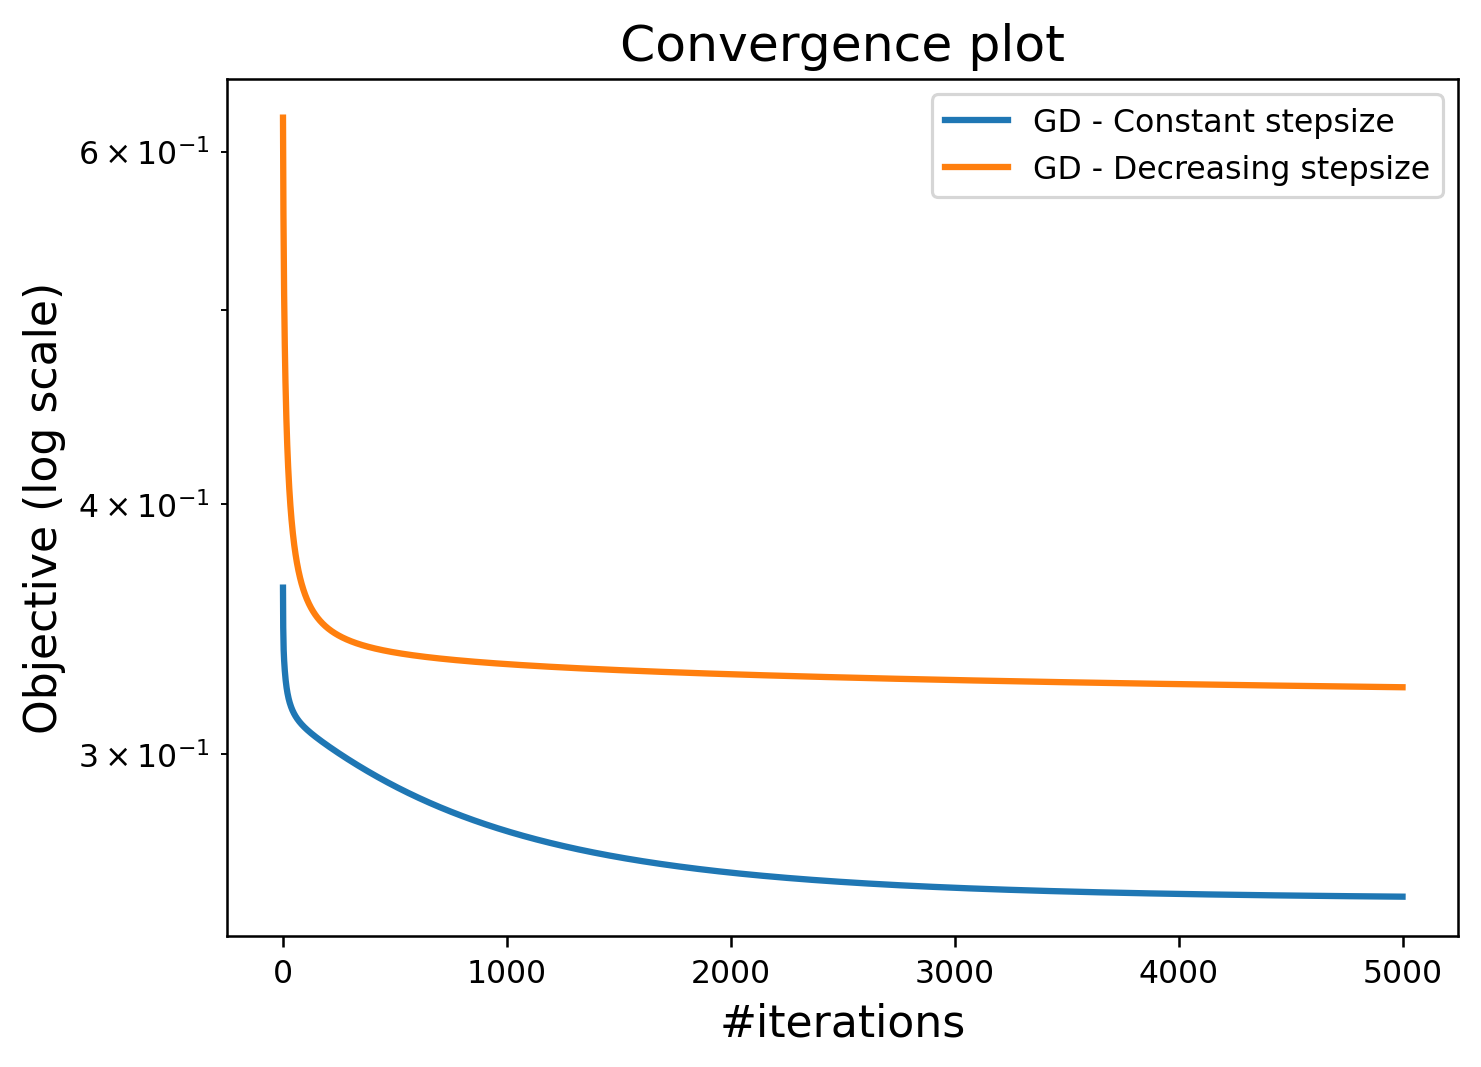

In [90]:
# Implementation - Compare both variants on 1 run
plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(7, 5))
plt.semilogy(obj_a, label="GD - Constant stepsize", lw=2)
plt.semilogy(obj_b, label="GD - Decreasing stepsize", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.savefig('GD_Constant_vs_Decreasing.png')

## Performance on training and testing set 
Constant step size

In [171]:
# Lasso regularization
Lambda = 1. / n ** (0.5)
regularization = 'L1'
w_t, obj_t = gradient_descent(w0, niter=5000, stepchoice=0, step0=1)

# Regularization Ridge
Lambda = 1. / n ** (0.5)
regularization = 'L2'
w_u, obj_u = gradient_descent(w0, niter=5000, stepchoice=0, step0=1)
#Classical gradient descent
Lambda = 0
w_w, obj_w = gradient_descent(w0, niter=5000,  stepchoice=0, step0=1)

In [172]:
print("------------- L1 ------------\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_t)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_t)))

print("\n")

print("--------- L2 ----\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_u)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_u)))


print("\n")

print("--------- Gradient Descent ----\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_w)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_w)))



------------- L1 ------------

Training accuracy = 0.8838
Testing accuracy = 0.884981198849812


--------- L2 ----

Training accuracy = 0.887
Testing accuracy = 0.8874142888741429


--------- Gradient Descent ----

Training accuracy = 0.8987
Testing accuracy = 0.900464499004645


## Performance on training and testing set 
Decreasing step size

In [178]:
# Lasso regularization
Lambda = 1. / n ** (0.5)
regularization = 'L1'
w_t, obj_t = gradient_descent(w0, niter=5000, stepchoice=0.01, step0=0.2)

# Regularization Ridge
Lambda = 1. / n ** (0.5)
regularization = 'L2'
w_u, obj_u = gradient_descent(w0, niter=5000, stepchoice=0.01, step0=0.2)
#Classical gradient descent
Lambda = 0
w_w, obj_w = gradient_descent(w0, niter=5000,  stepchoice=0.01, step0=0.2)

In [179]:
print("------------- L1 ------------\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_e)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_e)))

print("\n")

print("--------- L2 ----\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_f)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_f)))


print("\n")

print("--------- Gradient Descent ----\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_g)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_g)))

------------- L1 ------------

Training accuracy = 0.8848
Testing accuracy = 0.8863083388630834


--------- L2 ----

Training accuracy = 0.887
Testing accuracy = 0.8874142888741429


--------- Gradient Descent ----

Training accuracy = 0.8929
Testing accuracy = 0.893607608936076


 ## **III.2 Accelerated gradient descent** 

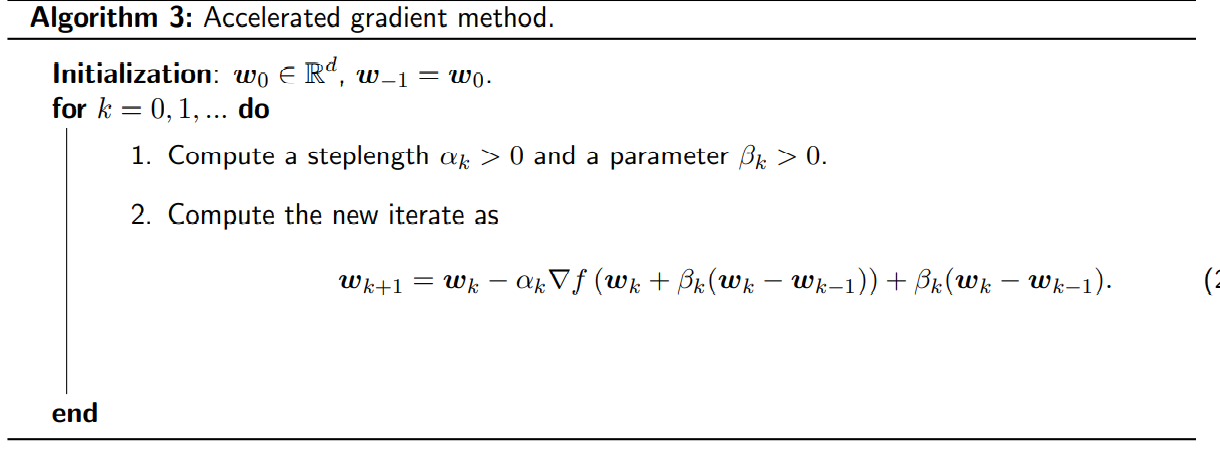

In [320]:
w0 = np.zeros( (p,1) )

def accelerated_gradient_descent(w0, niter=5000,stepchoice=0, step0=1):
    """
        A code for gradient descent with various step choices.
        
        Inputs:
            w0: Initial vector
            stepchoice: Strategy for computing the stepsize 
                0: Constant step size equal to 1/L
                t>0: Step size decreasing in 1/(k+1)**t
            step0: Initial steplength (only used when stepchoice is not 0)
            niter: Number of iterations, used as stopping criterion
            nb: Number of components drawn per iteration/Batch size 
                1: Classical stochastic gradient algorithm (default value)
            with_replace: Boolean indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
            
        Outputs:
            w_output: Final iterate of the method (or average if average=1)
            objvals: History of function values (Numpy array of length n_iter at most)
            normits: History of distances between iterates and optimum (Numpy array of length n_iter at most)
    """

    ElistA = np.zeros([niter,1])
    w, z, w_new = w0.copy(), w0.copy(), w0.copy()  # initialization
    t, p, beta = 1, 0, 0 # compute value of tk
    for i in np.arange(0,niter):
        if stepchoice == 0 : 
            '''
            z = w - prev_w
            prev_z = w  + beta * z
            w = prev_z - (step0/L_) * nablaE(prev_z, X_train, y_train)
            prev_w = z
            '''
            # gradient step
            w_new = z - (step0/L_) * nablaE(z, X_train, y_train)
            # Momentum step 
            z = w_new + beta * (w_new - w)
            # update sequence
            w = w_new
            
            # beta 
            t = (1/2) * (1 + np.sqrt(1 + 4*(p**2))) 
            beta = (p - 1) / t
            p = t
            # fin beta
            
        ElistA[i] = E(w,X_train,y_train)
    
    w_outputs = w.copy()
    
    return w_outputs, np.array(ElistA)         

### Performance on the training set and the testing set  


###  Comparison between gradient descent and accelerated descent

In [323]:
w_y, obj_y = accelerated_gradient_descent(w0, niter=10000, stepchoice=0, step0=1)
w_z, obj_z = gradient_descent(w0, niter=10000,  stepchoice=0, step0=1)

In [324]:
print("------------- Gradient Descent ------------\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_y)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_y)))

print("\n")

print("--------- Accelerated Gradient Descent ----\n")
print("Training accuracy = {}".format(evaluate(X_train,y_train, w_z)))
print("Testing accuracy = {}".format(evaluate(X_test,y_test, w_z)))

------------- Gradient Descent ------------

Training accuracy = 89.79
Testing accuracy = 89.98009289980094


--------- Accelerated Gradient Descent ----

Training accuracy = 89.8
Testing accuracy = 90.06856890068569


<Figure size 3632x681 with 0 Axes>

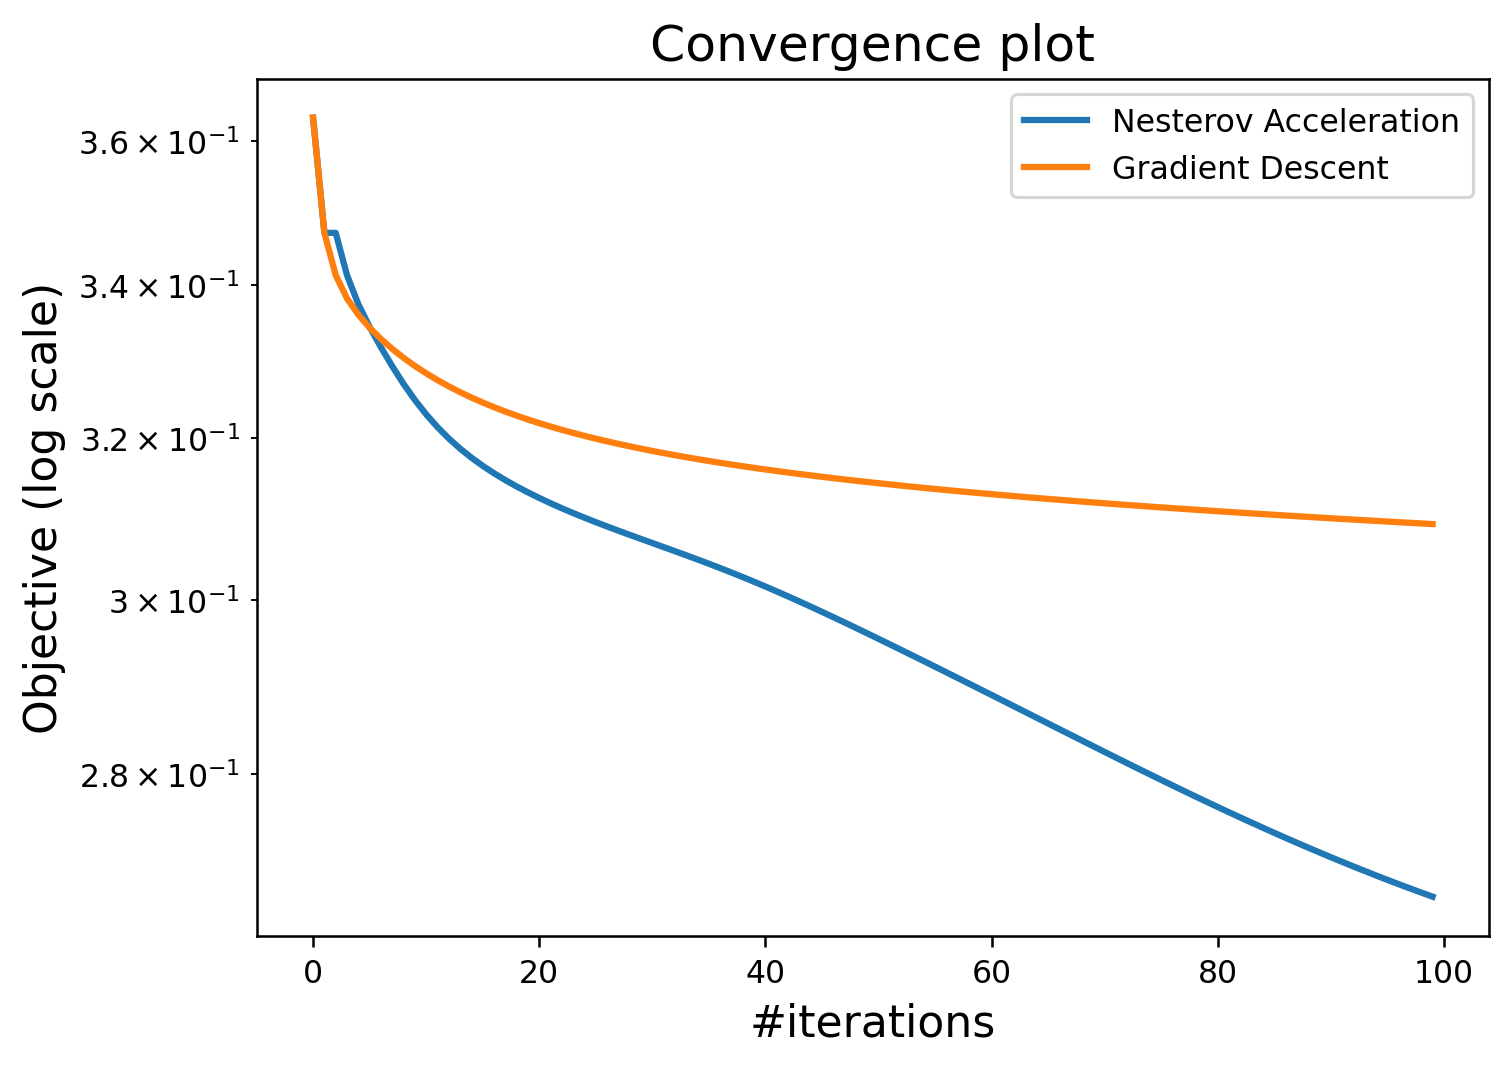

In [72]:
# Implementation - Compare both variants on 1 run
plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(7, 5))
plt.semilogy(obj_n, label="Nesterov Acceleration", lw=2)
plt.semilogy(obj_g, label="Gradient Descent", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.savefig('Gradient_Descent_vs_Nesterov_Acceleration.png')

## **III.3 Test of Stochastic Gradient Descent** 

The iteration of stochastic gradient (also called *Stochastic Gradient Descent*, or *SGD*) is given by:

$$
    \mathbf{w}_{k+1} = \mathbf{w}_k - \alpha_k \nabla f_{i_k}(\mathbf{w}_k),
$$

where $i_k$ is drawn at random in $\{1,\dots,n\}$. For the purpose of this lab session, $i_k$ will be drawn uniformly at random.



### Stochastic Gradient Descent 

In [100]:
def Make(y): return y.reshape((-1,1) )

In [101]:
def nablaEi(i,w): 
    return Make(- y_train[i] * X_train[i,:].transpose() * theta( - y_train[i] * (X_train[i,:].dot(w) )) )

In [260]:
w0 = np.zeros( (p,1) )

def stoch_grad_1(w0,stepchoice=0,step0=1, niter=100,nb=1, with_replace = False, verbose=True):
    ESto = []
    w = w0.copy()
    k = 0
    
    obj = E(w, X_train, y_train)
    ESto.append(obj)
    
    if verbose:
        print("Stochastic Gradient, batch size=",nb,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))
    
    
    while (k < niter):
        ik = np.random.choice(n,nb,replace=False)
        sg = np.zeros( (p,1) )
        for j in range(nb):
            gi = nablaEi(ik[j], w)
            sg = sg + gi
        sg = (1/nb) * sg 

        
        if stepchoice == 0 :
            w = w - (step0/L_) * sg
        elif stepchoice > 0 :
            sk = float(step0/((k+1) ** stepchoice))
            w = w - sk * sg
        
#         obj = E(w,X_train, y_train)
        
        k += 1
        
        if (k*nb) % n == 0:
            obj = E(w,X_train, y_train)
            ESto.append(obj)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)])) 
                
    # Plot quantities of interest for the last iterate (if needed)
    if (k*nb) % n > 0:
        ESto.append(obj)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))     
    
     
    w_outputs = w.copy()
    
    return w_outputs, np.array(ESto)

## **III.3.a Gradient descent vs Stochastic gradient on logistic regression**

*Implementation:* *Compare stochastic gradient and gradient descent on the logistic regression problem with 60 epochs and the step size strategies $\alpha_k = \tfrac{0.6}{L}$ and $\alpha_k = \tfrac{0.6}{\sqrt{k+1}}$.*

In [267]:
nb_epochs = 60
nbset = 1

# Run a - Gradient descent with constant stepsize
w_a, obj_a = stoch_grad_1(w0,stepchoice=0,step0=0.6, niter=nb_epochs,nb=n, verbose = False)

# Run b - Stochastic gradient with constant stepsize
# The version below may diverges, in which case the bound on norm(w) in the code will be triggered
w_b, obj_b = stoch_grad_1(w0,stepchoice=0,step0=0.6, niter=int(nb_epochs*n/nbset),nb=1, verbose = False)

# Run Gradient descent with decreasing stepsize
w_c, obj_c = stoch_grad_1(w0,stepchoice=0.2,step0=0.6, niter=nb_epochs,nb=n, verbose = False)
# Run Stochastic gradient with decreasing stepsize
w_d, obj_d = stoch_grad_1(w0,stepchoice=0.2,step0=0.6, niter=nb_epochs*n,nb=1, verbose = False)

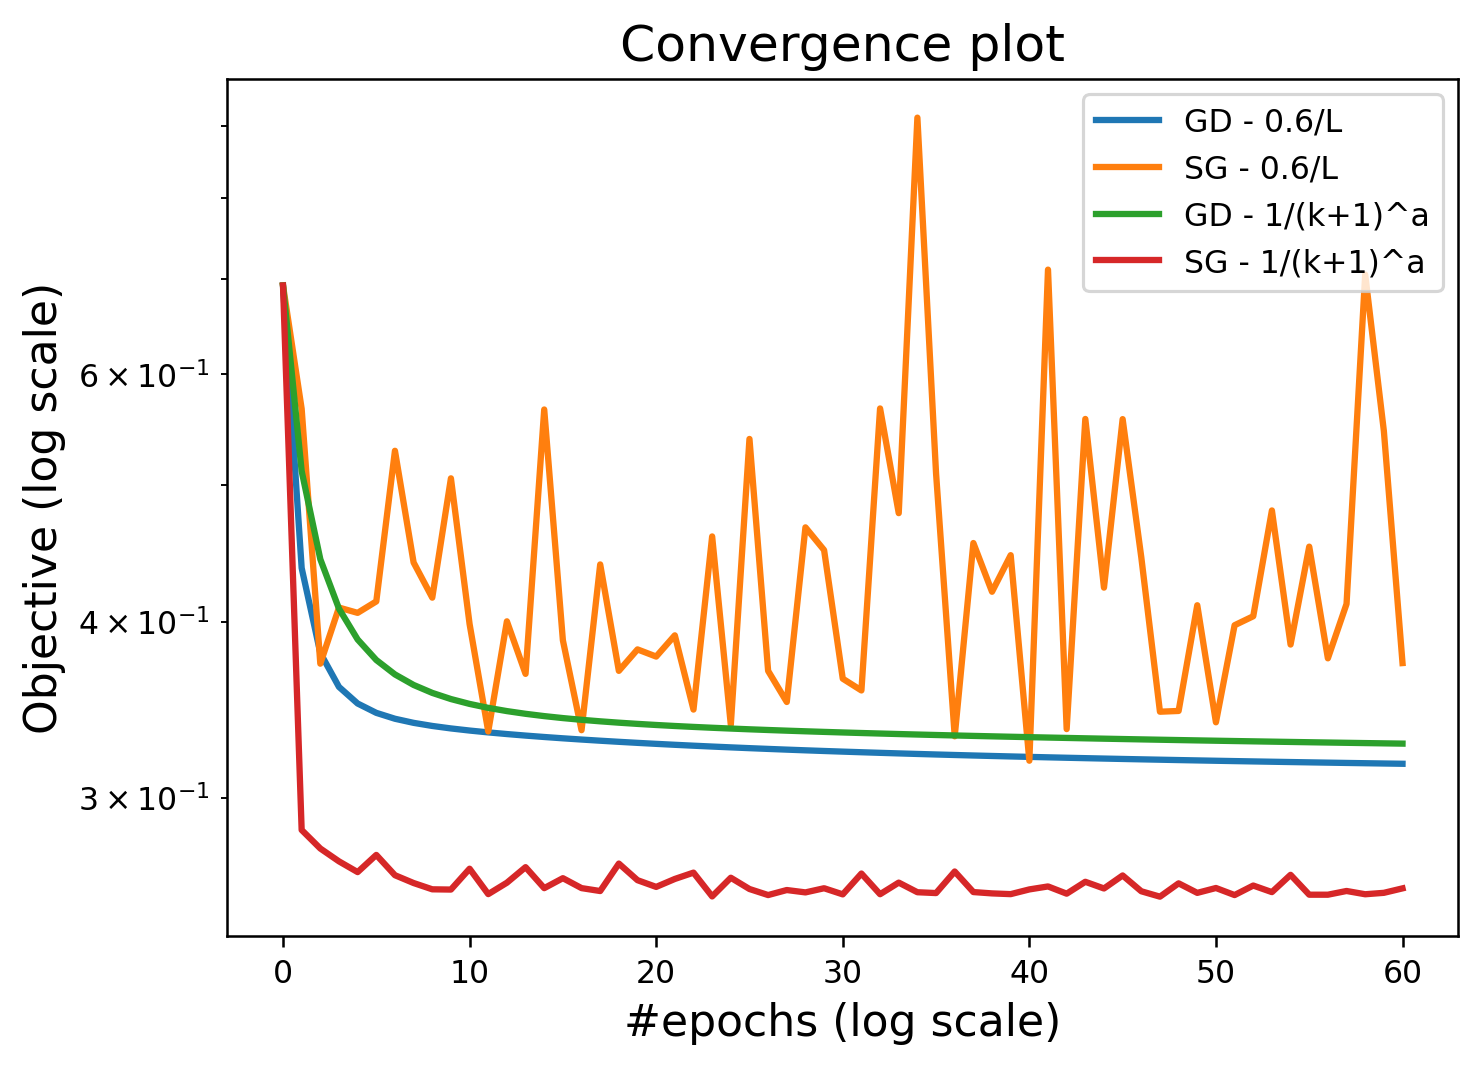

In [268]:
# Plot the comparison of variants of GD/SG with the same stepsize rule
# NB: The x-axis is in epochs (1 iteration of GD).

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(obj_a, label="GD - 0.6/L", lw=2)
plt.semilogy(obj_b, label="SG - 0.6/L", lw=2)
plt.semilogy(obj_c, label="GD - 1/(k+1)^a", lw=2)
plt.semilogy(obj_d, label="SG - 1/(k+1)^a", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.savefig('GD_SG_same_stepsize.png')

### Comparison between Sotchastic Gradient and Gradient Descent with decreasing stepsize 

In [271]:
print("--------- Decreasing step size ----\n")
print(" GD : Training accuracy = {}".format(evaluate(X_train,y_train, w_c)))
print(" GD : Testing accuracy = {}".format(evaluate(X_test,y_test, w_c)))
print(" SG : Training accuracy = {}".format(evaluate(X_train,y_train, w_d)))
print(" SG : Testing accuracy = {}".format(evaluate(X_test,y_test, w_d)))

--------- Decreasing step size ----

 GD : Training accuracy = 0.883
 GD : Testing accuracy = 0.8847600088476001
 SG : Training accuracy = 0.8985
 SG : Testing accuracy = 0.9002433090024331


In [272]:
print("--------- Constant step size ----\n")
print(" GD : Training accuracy = {}".format(evaluate(X_train,y_train, w_a)))
print(" GD : Testing accuracy = {}".format(evaluate(X_test,y_test, w_a)))
print(" SG : Training accuracy = {}".format(evaluate(X_train,y_train, w_b)))
print(" SG : Testing accuracy = {}".format(evaluate(X_test,y_test, w_b)))

--------- Constant step size ----

 GD : Training accuracy = 0.8867
 GD : Testing accuracy = 0.887193098871931
 SG : Training accuracy = 0.8903
 SG : Testing accuracy = 0.8840964388409644


## **III.3.b Experimenting wiht the decreasing step size**

In [287]:
# Run several instances of stochastic gradient with constant batch size

nb_epochs = 60
nbset = 1
w0 = np.zeros((p,1))

decstep = [1,2/3,1/2,1/4,0.2, 0]
nvals = len(decstep)
weights = ['w_1', 'w_2','w_3','w_4','w_5','w_6']

objs = np.zeros((nb_epochs+1,nvals))


for val, i  in zip(range(nvals), range(nvals)):
    weights[i], objs[:,val] = stoch_grad_1(w0,stepchoice=decstep[val],step0=0.2, niter=int(nb_epochs*n/nbset),nb=1)




Stochastic Gradient, batch size= 1 / 10000
  iter   |   fval  
       0 | 6.93e-01
   10000 | 4.00e-01
   20000 | 3.94e-01
   30000 | 3.92e-01
   40000 | 3.90e-01
   50000 | 3.88e-01
   60000 | 3.87e-01
   70000 | 3.86e-01
   80000 | 3.85e-01
   90000 | 3.85e-01
  100000 | 3.84e-01
  110000 | 3.84e-01
  120000 | 3.83e-01
  130000 | 3.83e-01
  140000 | 3.82e-01
  150000 | 3.82e-01
  160000 | 3.82e-01
  170000 | 3.81e-01
  180000 | 3.81e-01
  190000 | 3.81e-01
  200000 | 3.80e-01
  210000 | 3.80e-01
  220000 | 3.80e-01
  230000 | 3.80e-01
  240000 | 3.80e-01
  250000 | 3.79e-01
  260000 | 3.79e-01
  270000 | 3.79e-01
  280000 | 3.79e-01
  290000 | 3.79e-01
  300000 | 3.78e-01
  310000 | 3.78e-01
  320000 | 3.78e-01
  330000 | 3.78e-01
  340000 | 3.78e-01
  350000 | 3.78e-01
  360000 | 3.78e-01
  370000 | 3.77e-01
  380000 | 3.77e-01
  390000 | 3.77e-01
  400000 | 3.77e-01
  410000 | 3.77e-01
  420000 | 3.77e-01
  430000 | 3.77e-01
  440000 | 3.77e-01
  450000 | 3.77e-01
  460000 | 3.76e-

 SG -(k+1)^ 1 : Training accuracy = 0.883
 SG -(k+1)^ 1 : Testing accuracy = 0.8847600088476001
 SG -(k+1)^ 0.6666666666666666 : Training accuracy = 0.8847
 SG -(k+1)^ 0.6666666666666666 : Testing accuracy = 0.8856447688564477
 SG -(k+1)^ 0.5 : Training accuracy = 0.8924
 SG -(k+1)^ 0.5 : Testing accuracy = 0.8931652289316523
 SG -(k+1)^ 0.25 : Training accuracy = 0.897
 SG -(k+1)^ 0.25 : Testing accuracy = 0.8991373589913736
 SG -(k+1)^ 0.2 : Training accuracy = 0.8992
 SG -(k+1)^ 0.2 : Testing accuracy = 0.8998009289980093
 SG -(k+1)^ 0 : Training accuracy = 0.8941
 SG -(k+1)^ 0 : Testing accuracy = 0.8940499889404999


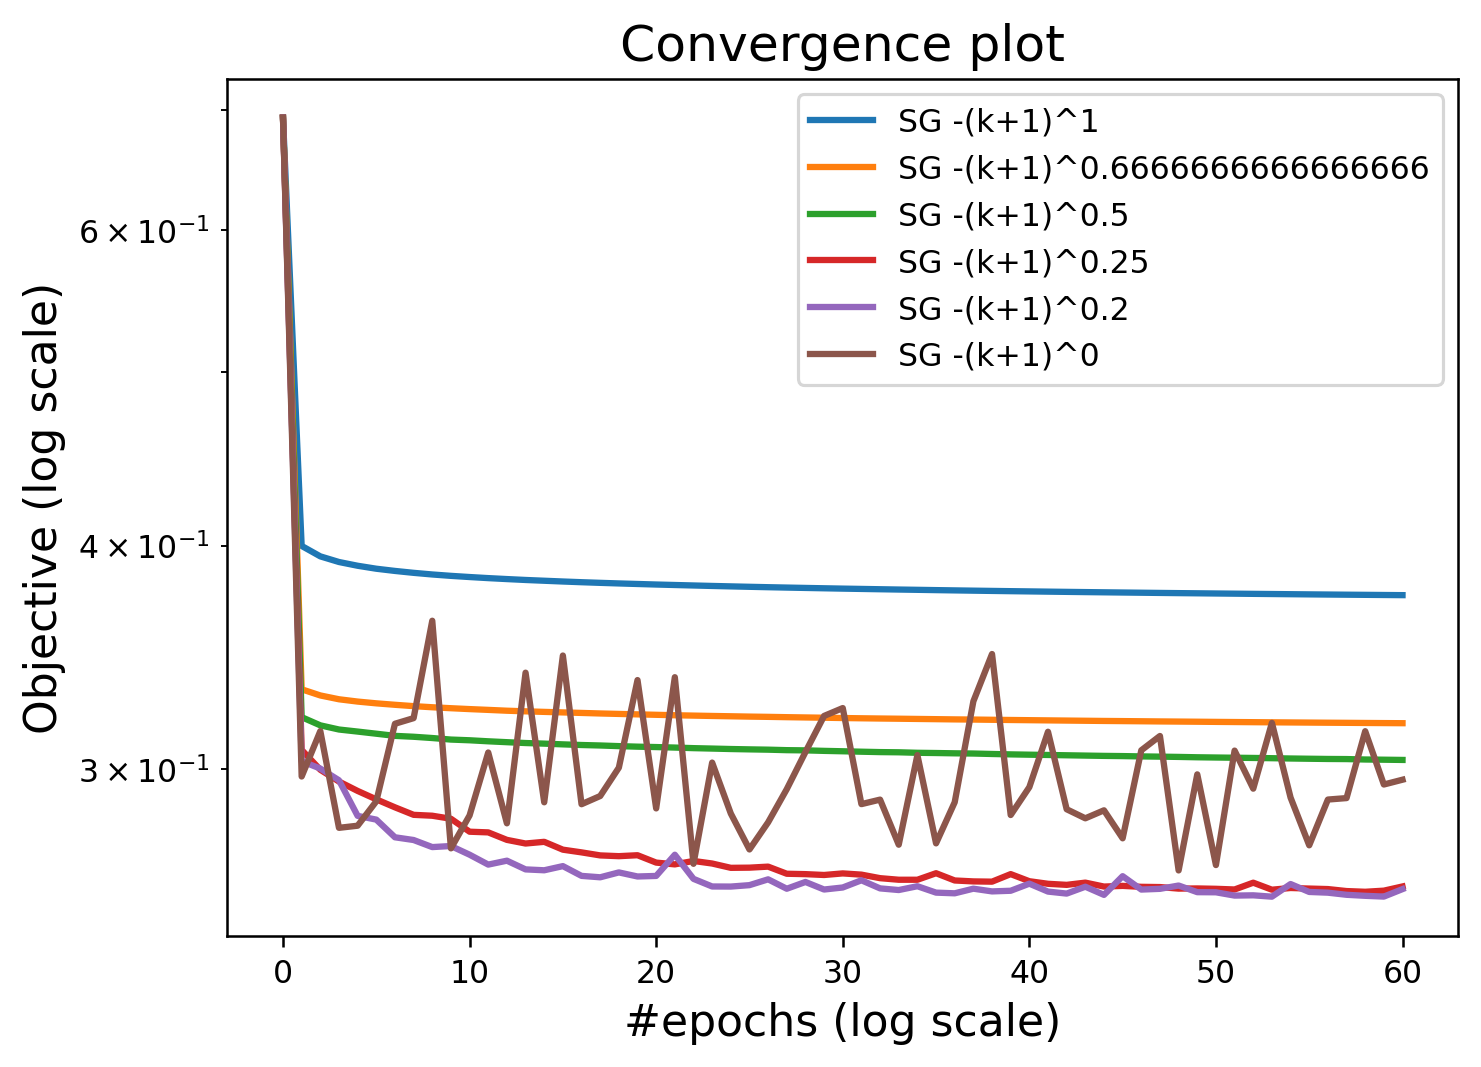

In [289]:
# Plot the comparison of variants of SG with different (constant) stepsizes
# NB: The x-axis is in epochs (1 iteration of GD).

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.set_cmap("RdPu")
for val, i in zip(range(nvals), range(nvals)):
    print(" SG -(k+1)^ {} : Training accuracy = {}".format(decstep[val] , evaluate(X_train,y_train, weights[i])))
    print(" SG -(k+1)^ {} : Testing accuracy = {}".format(decstep[val] , evaluate(X_test,y_test, weights[i])))
    plt.semilogy(objs[:,val], label="SG -(k+1)^"+str(decstep[val]), lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc=1)
plt.savefig('SG_decreasing_stepsize.png')

## **III.3.c Experimenting with the batch size**

A more general version of stochastic gradient, called batch stochastic gradient, is given by the iteration
$$
    \mathbf{w}_{k+1} = \mathbf{w}_k - \frac{\alpha_k}{|S_k|} \sum_{i \in S_k} \nabla f_i(\mathbf{w}_k)
$$
where $S_k$ is a set of indices drawn uniformly in $\{1,\dots,n\}$. For this lab, the samples will be drawn without replacement, so that $|S_k|=n$ results in a full gradient step, while $|S_k|=1$ corresponds to a basic stochastic gradient step. In this notebook, we will focus on using the same batch size across all iterations.

**Experimentation:** Comparison of  the performance of stochastic gradient with several values for the batch size (and using decreasing stepsizes).   
*values considered: $n_b \in \left\{1,\tfrac{n}{100},\tfrac{n}{10},\tfrac{n}{2},n \right\}$ to include stochastic gradient ($n_b=1$) and gradient descent ($n_b=n$).*

In [312]:
# Test several values for the batch size using the same epoch budget.

nb_epochs = 60
replace_batch = False

In [313]:
# Stochastic gradient (batch size 1)
w_e, obj_e = stoch_grad_1(w0,stepchoice=0,step0=0.6, niter=nb_epochs*n,nb=1)

# Batch stochastic gradient (batch size n/1000)
nbset=int(n/1000)
w_f, obj_f = stoch_grad_1(w0,stepchoice=0,step0=1, niter=int(nb_epochs*n/nbset),nb=nbset,with_replace=replace_batch)

# Batch stochastic gradient (batch size n/100)
nbset=int(n/100)
w_g, obj_g = stoch_grad_1(w0, stepchoice=0,step0=1, niter=int(nb_epochs*n/nbset),nb=nbset,with_replace=replace_batch)

# Batch stochastic gradient (batch size n/10)
nbset=int(n/10)
w_h, obj_h = stoch_grad_1(w0,stepchoice=0,step0=0.6, niter=int(nb_epochs*n/nbset),nb=nbset,with_replace=replace_batch)

# Gradient descent (batch size n, taken without replacement)
w_i, obj_i = stoch_grad_1(w0,stepchoice=0,step0=0.6, niter=int(nb_epochs),nb=n)

Stochastic Gradient, batch size= 1 / 10000
  iter   |   fval  
       0 | 6.93e-01
   10000 | 3.47e-01
   20000 | 5.84e-01
   30000 | 3.49e-01
   40000 | 3.21e-01
   50000 | 5.50e-01
   60000 | 5.13e-01
   70000 | 4.54e-01
   80000 | 3.88e-01
   90000 | 3.65e-01
  100000 | 3.74e-01
  110000 | 4.33e-01
  120000 | 5.08e-01
  130000 | 5.17e-01
  140000 | 9.18e-01
  150000 | 1.04e+00
  160000 | 4.00e-01
  170000 | 4.30e-01
  180000 | 5.42e-01
  190000 | 4.72e-01
  200000 | 4.65e-01
  210000 | 4.21e-01
  220000 | 3.02e-01
  230000 | 6.00e-01
  240000 | 5.43e-01
  250000 | 4.54e-01
  260000 | 5.27e-01
  270000 | 4.82e-01
  280000 | 4.53e-01
  290000 | 4.00e-01
  300000 | 4.29e-01
  310000 | 4.44e-01
  320000 | 4.01e-01
  330000 | 7.09e-01
  340000 | 6.66e-01
  350000 | 3.76e-01
  360000 | 3.58e-01
  370000 | 3.64e-01
  380000 | 4.20e-01
  390000 | 3.61e-01
  400000 | 3.62e-01
  410000 | 4.58e-01
  420000 | 3.69e-01
  430000 | 5.37e-01
  440000 | 4.44e-01
  450000 | 4.47e-01
  460000 | 3.77e-

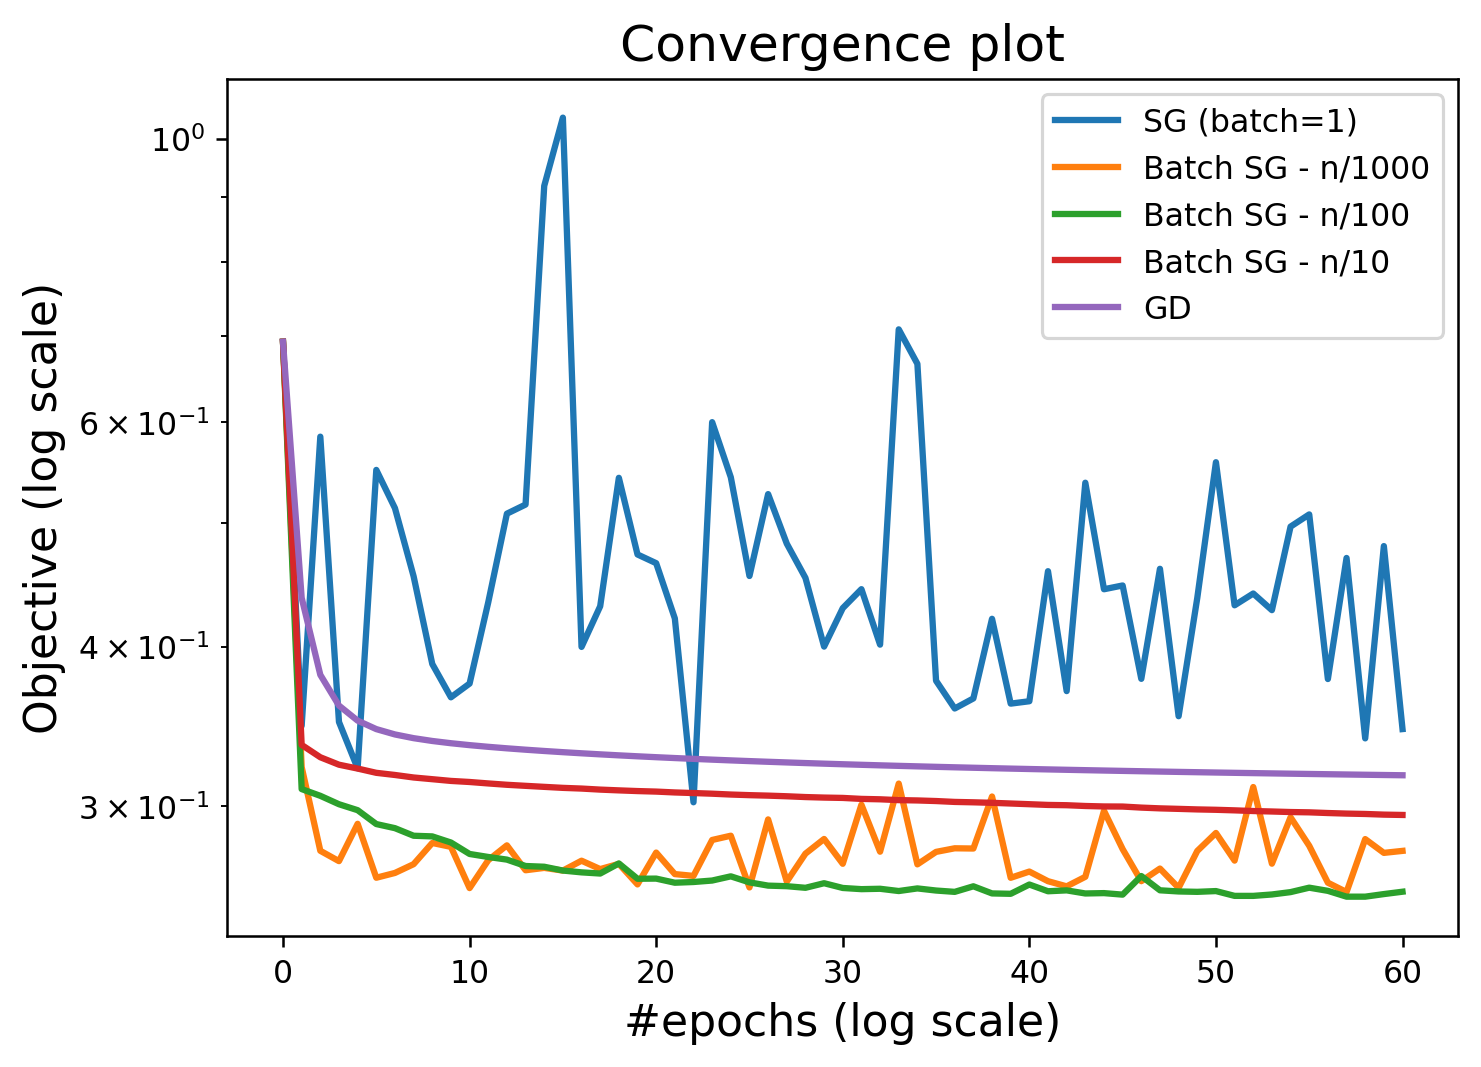

In [314]:
# Plot the comparison of variants of batch SGD with the same stepsize rule

# In terms of objective value (logarithmic scale)
# plt.figure(figsize=(16,3))
# plt.rcParams['figure.dpi'] = 227

plt.figure(figsize=(7, 5))
plt.semilogy(obj_e, label="SG (batch=1)", lw=2)
plt.semilogy(obj_f, label="Batch SG - n/1000", lw=2)
plt.semilogy(obj_g, label="Batch SG - n/100", lw=2)
plt.semilogy(obj_h, label="Batch SG - n/10", lw=2)
plt.semilogy(obj_i, label="GD", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.savefig('Batch_SGD_same_stepsize.png')

In [315]:
print("--------- Decreasing step size ----\n")
print("Batch SG - n/1000 : Training accuracy = {}".format(evaluate(X_train,y_train, w_f)))
print("Batch SG - n/1000 : Testing accuracy = {}".format(evaluate(X_test,y_test, w_f)))
print(" Batch SG - n/100 : Training accuracy = {}".format(evaluate(X_train,y_train, w_g)))
print("Batch SG - n/100 : Testing accuracy = {}".format(evaluate(X_test,y_test, w_g)))

--------- Decreasing step size ----

Batch SG - n/1000 : Training accuracy = 89.68
Batch SG - n/1000 : Testing accuracy = 89.8252598982526
 Batch SG - n/100 : Training accuracy = 89.91
Batch SG - n/100 : Testing accuracy = 89.84737889847378


## **III.3.d  Experimenting with learning rate**

In [109]:
# Run several instances of stochastic gradient with constant batch size

nb_epochs = 60
nbset = 1
w0 = np.zeros((p,1))

valsstep0 = [1, 0.6, 0.1,0.01,0.001,0.0001]
nvals = len(valsstep0)

objs = np.zeros((nb_epochs+1,nvals))

for val in range(nvals):
    _, objs[:,val] = stoch_grad_1(w0,stepchoice=0,step0=valsstep0[val], niter=int(nb_epochs*n/nbset),nb=1)


Stochastic Gradient, batch size= 1 / 10000
  iter   |   fval  
       0 | 6.93e-01
   10000 | 8.68e-01
   20000 | 7.00e-01
   30000 | 4.96e-01
   40000 | 6.25e-01
   50000 | 5.31e-01
   60000 | 6.78e-01
   70000 | 5.75e-01
   80000 | 6.08e-01
   90000 | 5.15e-01
  100000 | 7.95e-01
  110000 | 1.07e+00
  120000 | 1.68e+00
  130000 | 5.26e-01
  140000 | 5.30e-01
  150000 | 1.12e+00
  160000 | 6.24e-01
  170000 | 5.25e-01
  180000 | 7.21e-01
  190000 | 5.93e-01
  200000 | 4.16e-01
  210000 | 5.15e-01
  220000 | 6.05e-01
  230000 | 4.87e-01
  240000 | 7.89e-01
  250000 | 4.77e-01
  260000 | 9.41e-01
  270000 | 1.14e+00
  280000 | 6.78e-01
  290000 | 1.40e+00
  300000 | 6.23e-01
  310000 | 6.88e-01
  320000 | 8.76e-01
  330000 | 4.66e-01
  340000 | 5.00e-01
  350000 | 9.03e-01
  360000 | 6.73e-01
  370000 | 6.86e-01
  380000 | 7.86e-01
  390000 | 5.64e-01
  400000 | 4.80e-01
  410000 | 5.54e-01
  420000 | 5.78e-01
  430000 | 6.91e-01
  440000 | 1.64e+00
  450000 | 9.29e-01
  460000 | 6.15e-

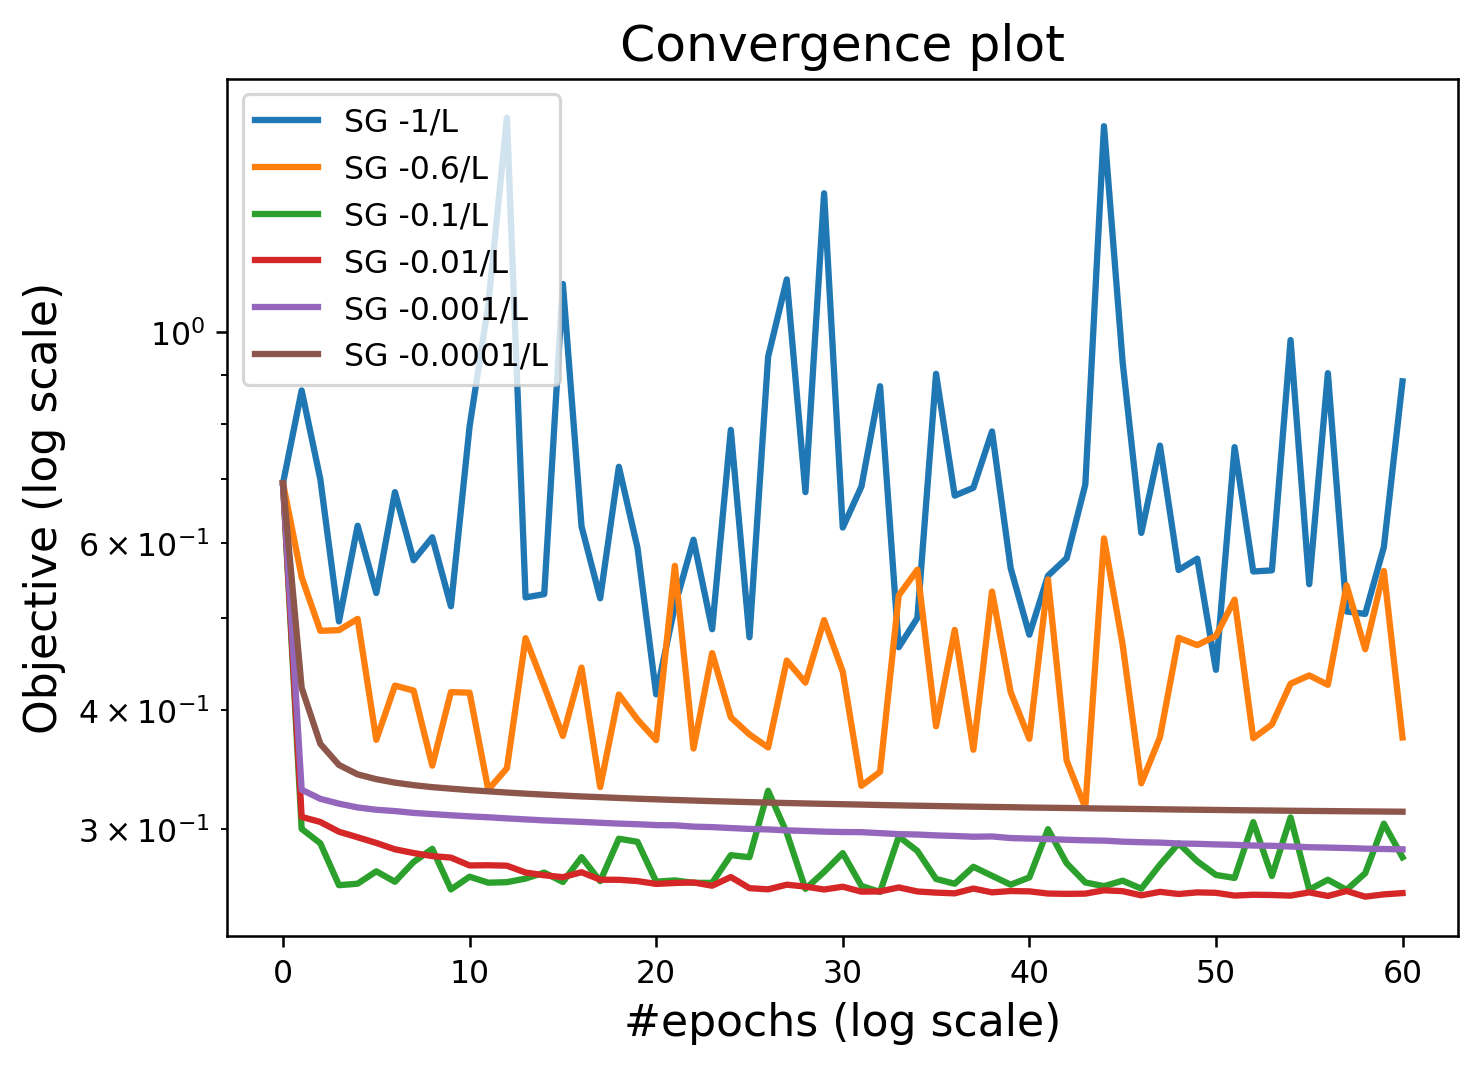

In [110]:
# Plot the comparison of variants of SG with different (constant) stepsizes
# NB: The x-axis is in epochs (1 iteration of GD).

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.set_cmap("RdPu")
for val in range(nvals):
    plt.semilogy(objs[:,val], label="SG -"+str(valsstep0[val])+"/L", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.savefig('SG_different_stepsize.png')

## **III.3.e Popular practical variants based on diagonal scaling**

### SGD using Diagonal scaling 

The most successful variants of stochastic gradient, such as *RMSProp* and *Adagrad*, rely on a diagonal scaling of the gradient. This corresponds to rescaling the stochastic gradient step componentwise as follows
 $$
     [\mathbf{w}_{k+1}]_i  = [\mathbf{w}_k]_i -\frac{\alpha}{\sqrt{[\mathbf{v}_k]_i + \mu}}[\nabla f_{i_k}(\mathbf{w}_k)]_i,
 $$ 
 where $\mu>0$ is a regularization parameter, and $\mathbf{v}_k \in \mathbb{R}^d$ is defined recursively by $\mathbf{v}_{-1} = 0_{\mathbb{R}^d}$ and
 $$ 
     \forall k \ge 0,\ \forall i=1,\dots,d, \qquad 
     [\mathbf{v}_k]_i = 
     \left\{
         \begin{array}{ll}
             \beta [\mathbf{v}_{k-1}]_i + (1-\beta) [\nabla f_{i_k}(\mathbf{w}_k)]_i^2 &\mbox{for RMSProp,} \\
             [\mathbf{v}_{k-1}]_i + [\nabla f_{i_k}(\mathbf{w}_k)]_i^2 &\mbox{for Adagrad.}
         \end{array}
     \right.
 $$
(Suggested values: $\mu=\tfrac{1}{2 \sqrt{n}}$, $\beta=0.8$.)

In [111]:
w0 = np.zeros( (p,1) )

def stoch_grad_2(w0,stepchoice=0,step0=1, niter=100, nb=1,average = 0, scaling = 0, with_replace = False):
    """
    A code for gradient descent with various step choices.
        
        Inputs:
            w0: Initial vector
            stepchoice: Strategy for computing the stepsize 
                0: Constant step size equal to 1/L
                1: Step size decreasing in 1/sqrt(k+1)
            step0: Initial steplength (only used when stepchoice is not 0)
            n_iter: Number of iterations, used as stopping criterion
            nb: Number of components drawn per iteration/Batch size 
                1: Classical stochastic gradient algorithm (default value)
                problem.n: Classical gradient descent (default value)
            average: Indicates whether the method computes the average of the iterates 
                0: No averaging (default)
                1: With averaging
            scaling: Use a diagonal scaling
                0: No scaling (default)
                1: Average of magnitudes (RMSProp)
                2: Normalization with magnitudes (Adagrad)
            with_replace: Boolean indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
            
        Outputs:
            w_output: Final iterate of the method (or average if average=1)
            objvals: History of function values (Numpy array of length n_iter at most)
            
    
    """
    ElistS2 = []
    w = w0.copy()
    
    obj = E(w, X_train, y_train)
    ElistS2.append(obj)

    ## averaging -- block code 
    if average : 
        wavg = np.zeros((len(w), 1))

    # scaling values    
    if scaling > 0 :
        mu=1/(2 *(n ** (0.5)))
        v = np.zeros( (p,1) )
        beta = 0.8

    k = 0

    # Plot initial quantities of interest
    print("Stochastic Gradient, batch size=",nb,"/",n)
    print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
    print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))

    while (k < niter):
        ik = np.random.choice(n, nb, replace = False)
        sg = np.zeros( (p,1) )
        for j in range(nb):
            gi = nablaEi(ik[j], w)
            sg = sg + gi
        sg = (1/nb) * sg   

        if scaling > 0 : 
            if scaling==1:
                # RMSprop update
                v = beta*v + (1-beta)*sg*sg
            elif scaling==2 :
                # adagrad update
                v = v + sg*sg
            sg = sg /(np.sqrt(v + mu))               


        if stepchoice == 0 :
            w = w - (step0/L_) * sg
        elif stepchoice == 1 :
            sk = float(step0/(np.sqrt(k+1)))
            w = w - sk * sg

        if average : 
            # compute the average of iterates
            wavg = k/(k+1) *wavg + w/(k+1)

        k = k + 1
        
        if (k*nb) % n == 0:
            if average :
                obj = E(wavg,X_train, y_train)
            else :
                obj = E(w,X_train, y_train)
            
            ElistS2.append(obj)
            
            if True:
                print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))       
     
        # Outputs
    if average:
        w_outputs = wavg.copy()
    else:
        w_outputs = w.copy()

    return w_outputs, np.array(ElistS2)

In [112]:
# Comparison of stochastic gradient with and without diagonal scaling

nb_epochs = 100

# Stochastic gradient (batch size 1) without diagonal scaling
w_j, obj_j = stoch_grad_2(w0,stepchoice=0,step0=0.6, niter=nb_epochs*n,nb=1)
# Stochastic gradient (batch size 1) with RMSProp diagonal scaling
w_k, obj_k = stoch_grad_2(w0,stepchoice=0,step0=0.6, niter=nb_epochs*n,nb=1,average=0,scaling=1)
# Stochastic gradient (batch size 1) with Adagrad diagonal scaling - Constant step size
w_l, obj_l = stoch_grad_2(w0,stepchoice=0,step0=0.6, niter=nb_epochs*n,nb=1,average=0,scaling=2)
# Stochastic gradient (batch size 1) with Adagrad diagonal scaling - Decreasing step size
w_mm, obj_mm = stoch_grad_2(w0,stepchoice=1,step0=0.6, niter=nb_epochs*n,nb=1,average=0,scaling=2)

Stochastic Gradient, batch size= 1 / 10000
  iter   |   fval  
       0 | 6.93e-01
   10000 | 6.08e-01
   20000 | 3.49e-01
   30000 | 4.34e-01
   40000 | 6.28e-01
   50000 | 6.41e-01
   60000 | 4.03e-01
   70000 | 5.58e-01
   80000 | 3.73e-01
   90000 | 3.85e-01
  100000 | 3.65e-01
  110000 | 3.25e-01
  120000 | 3.75e-01
  130000 | 3.30e-01
  140000 | 4.58e-01
  150000 | 4.24e-01
  160000 | 4.52e-01
  170000 | 3.55e-01
  180000 | 5.23e-01
  190000 | 4.18e-01
  200000 | 4.73e-01
  210000 | 4.76e-01
  220000 | 4.18e-01
  230000 | 7.47e-01
  240000 | 3.47e-01
  250000 | 4.07e-01
  260000 | 4.98e-01
  270000 | 4.15e-01
  280000 | 4.09e-01
  290000 | 4.59e-01
  300000 | 5.62e-01
  310000 | 4.77e-01
  320000 | 3.89e-01
  330000 | 8.83e-01
  340000 | 3.52e-01
  350000 | 7.06e-01
  360000 | 3.21e-01
  370000 | 4.47e-01
  380000 | 3.69e-01
  390000 | 5.39e-01
  400000 | 5.76e-01
  410000 | 4.04e-01
  420000 | 3.82e-01
  430000 | 4.12e-01
  440000 | 4.51e-01
  450000 | 3.75e-01
  460000 | 4.21e-

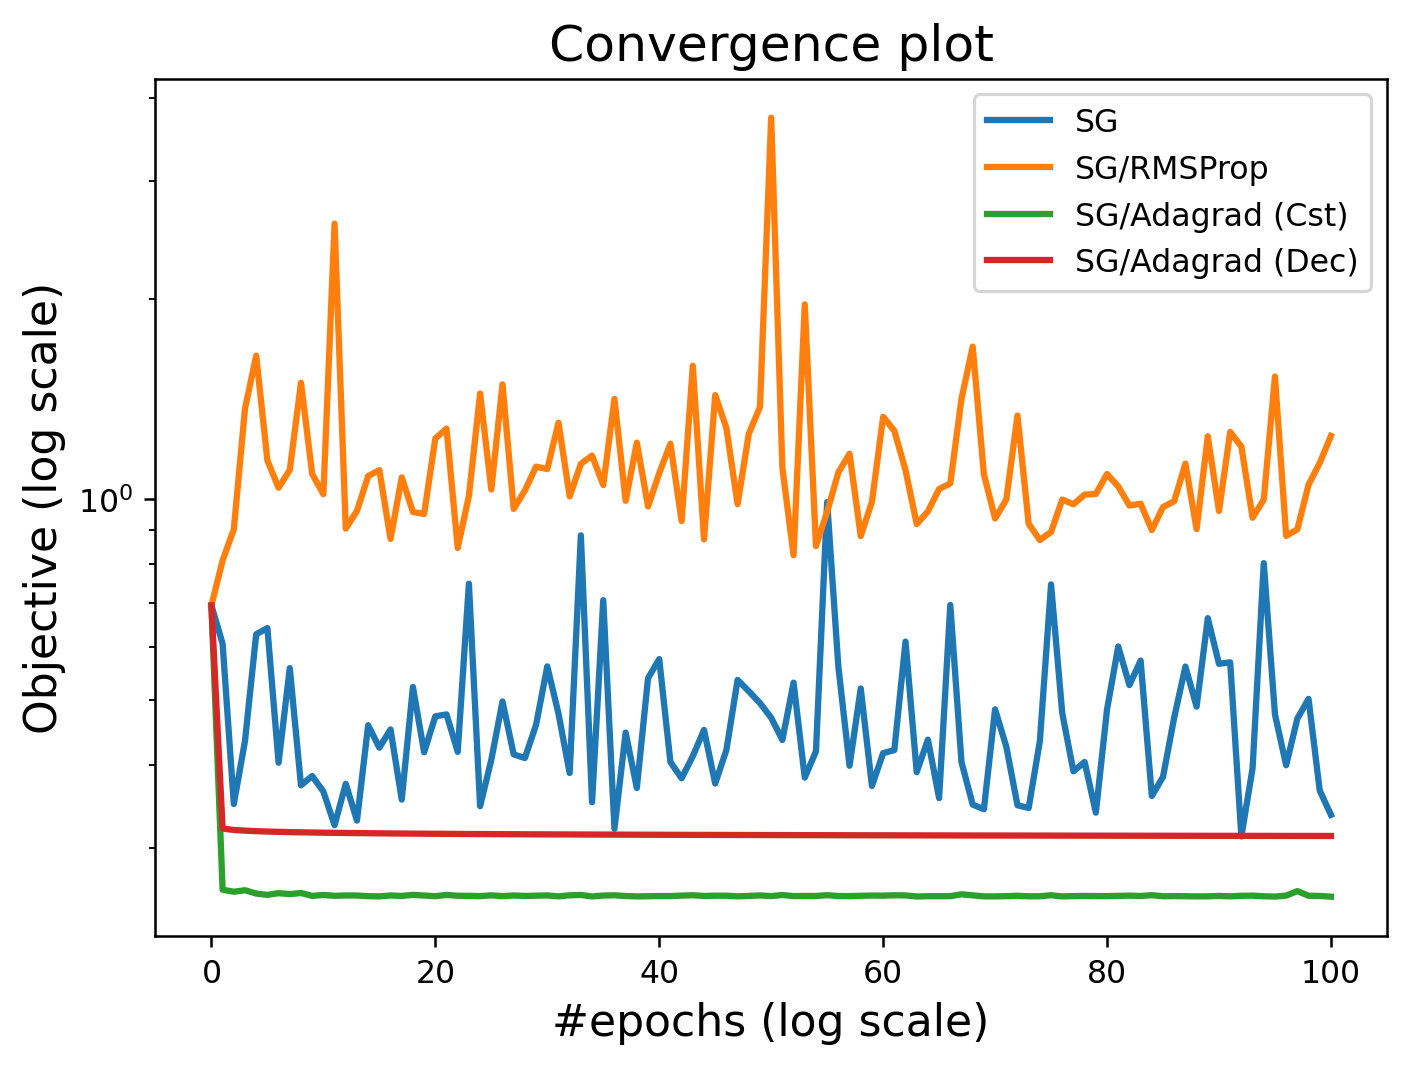

In [113]:
# Plot the results - Comparison of stochastic gradient with and without diagonal scaling
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(obj_j, label="SG", lw=2)
plt.semilogy(obj_k, label="SG/RMSProp", lw=2)
plt.semilogy(obj_l, label="SG/Adagrad (Cst)", lw=2)
plt.semilogy(obj_mm, label="SG/Adagrad (Dec)", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.savefig('SG_diagonal_scaling.png')

## **III.3.f Stochastic gradient and averaging</span>**

In [114]:
# Comparison of stochastic gradient with and without averaging
nb_epochs = 60
w0 = np.zeros((p,1))

nruns = 10

obj_a = np.zeros((nruns,nb_epochs+1))
obj_b = np.zeros((nruns,nb_epochs+1))

for i in range(nruns):
    # Run standard stochastic gradient without averaging
    _, obj_a[i,:] = stoch_grad_2(w0,stepchoice=0,step0=0.6, niter=nb_epochs*n,nb=1)
    # Run stochastic gradient with averaging
    _, obj_b[i,:] = stoch_grad_2(w0,stepchoice=0,step0=0.6, niter=nb_epochs*n,nb=1,average=1)



Stochastic Gradient, batch size= 1 / 10000
  iter   |   fval  
       0 | 6.93e-01
   10000 | 3.27e-01
   20000 | 3.52e-01
   30000 | 4.64e-01
   40000 | 5.30e-01
   50000 | 3.77e-01
   60000 | 6.36e-01
   70000 | 3.81e-01
   80000 | 5.42e-01
   90000 | 4.15e-01
  100000 | 5.10e-01
  110000 | 4.50e-01
  120000 | 3.43e-01
  130000 | 5.38e-01
  140000 | 3.71e-01
  150000 | 4.13e-01
  160000 | 5.94e-01
  170000 | 3.20e-01
  180000 | 1.23e+00
  190000 | 3.26e-01
  200000 | 4.14e-01
  210000 | 3.53e-01
  220000 | 4.91e-01
  230000 | 4.95e-01
  240000 | 3.77e-01
  250000 | 5.27e-01
  260000 | 5.03e-01
  270000 | 3.44e-01
  280000 | 4.30e-01
  290000 | 3.50e-01
  300000 | 5.02e-01
  310000 | 5.33e-01
  320000 | 3.75e-01
  330000 | 6.11e-01
  340000 | 4.94e-01
  350000 | 3.62e-01
  360000 | 5.02e-01
  370000 | 4.15e-01
  380000 | 3.23e-01
  390000 | 4.47e-01
  400000 | 3.79e-01
  410000 | 3.60e-01
  420000 | 4.83e-01
  430000 | 3.94e-01
  440000 | 4.10e-01
  450000 | 3.93e-01
  460000 | 4.67e-

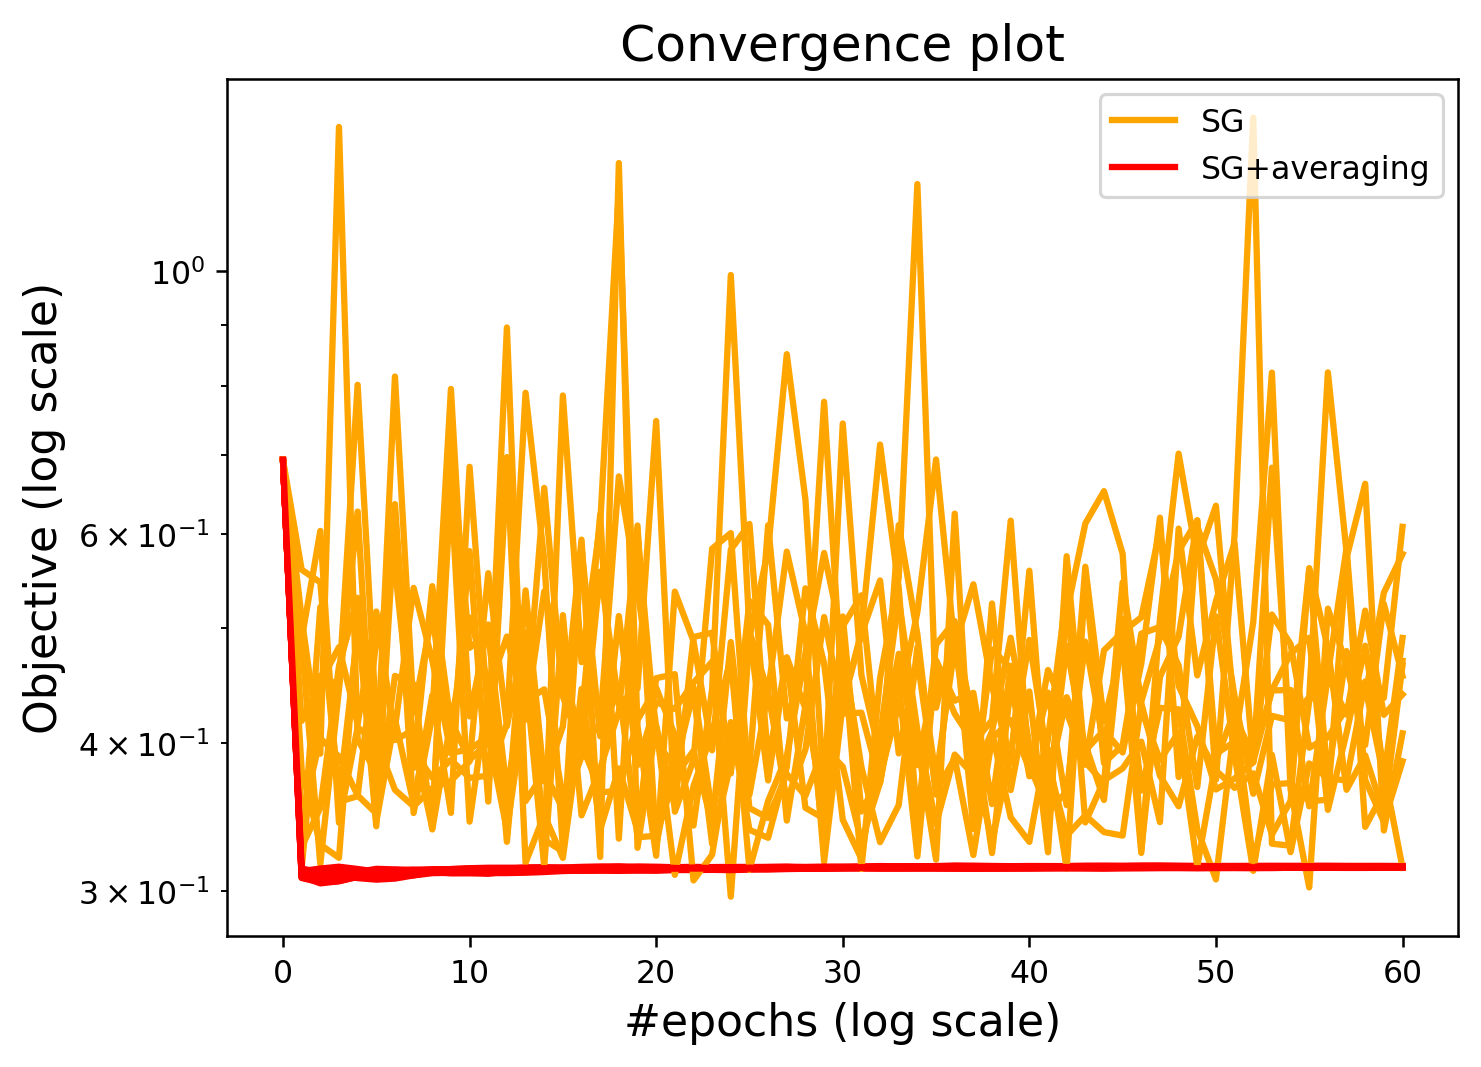

In [115]:
# Plot the results
plt.figure(figsize=(7, 5))
for i in range(nruns-1):
    plt.semilogy(obj_a[i,:],color='orange',lw=2)
    plt.semilogy(obj_b[i,:],color='red', lw=2)
plt.semilogy(obj_a[-1,:],label='SG',color='orange',lw=2)
plt.semilogy(obj_b[-1,:],label='SG+averaging',color='red', lw=2)
    
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.savefig('SG+averaging.png')

# **IV. Test de Prédiction avec scikit_learn** 

## Test avec la librairie Scikit-Learn 

In [390]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga')
lr.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='saga')

In [391]:
lr.score(X_train, y_train) 

0.8975

In [392]:
lr.score(X_test, y_test)

0.9002433090024331

In [393]:
lr.predict_proba(X_train)

array([[0.94766612, 0.05233388],
       [0.95665135, 0.04334865],
       [0.96207249, 0.03792751],
       ...,
       [0.92880482, 0.07119518],
       [0.93731887, 0.06268113],
       [0.95062709, 0.04937291]])

In [394]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3937   63]
 [ 388  133]]
              precision    recall  f1-score   support

        -1.0       0.91      0.98      0.95      4000
         1.0       0.68      0.26      0.37       521

    accuracy                           0.90      4521
   macro avg       0.79      0.62      0.66      4521
weighted avg       0.88      0.90      0.88      4521



C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[3937   63]
 [ 388  133]]
              precision    recall  f1-score   support

        -1.0       0.91      0.98      0.95      4000
         1.0       0.68      0.26      0.37       521

    accuracy                           0.90      4521
   macro avg       0.79      0.62      0.66      4521
weighted avg       0.88      0.90      0.88      4521



C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

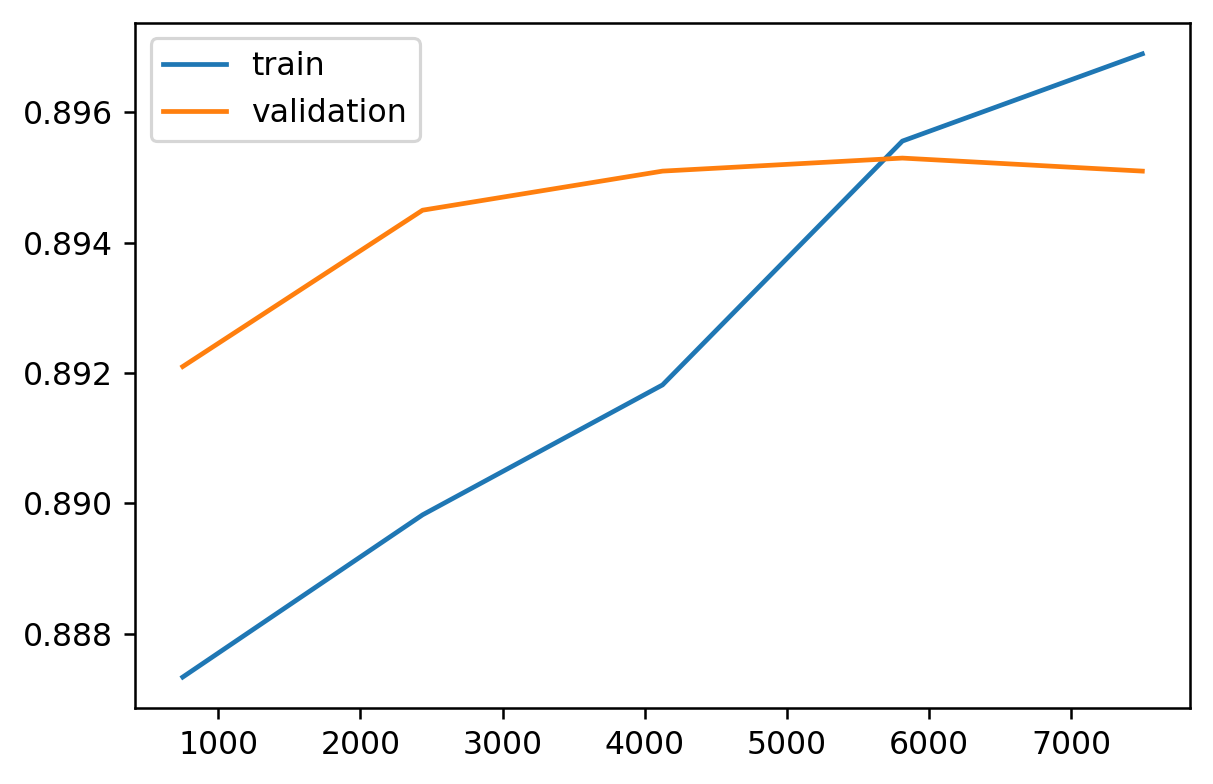

In [397]:
from sklearn.model_selection import train_test_split, learning_curve
def evaluation_modele(modele):
    modele.fit(X_train, y_train)
    y_pred = modele.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(modele, X_train, y_train, cv=4,
    scoring='accuracy', train_sizes=np.linspace(0.1, 1,5))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.legend()
    plt.savefig('scklearn_val_curve.png')

evaluation_modele(lr)

## Fin du test
Le decoupage est bien fait et l'algorithme semble converger